In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# PART 1 (ANALYSIS)

## Cleaning the data

In [2]:
Origin_data = pd.read_csv('Insurance_data.csv')
Origin_data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [3]:
#Age column has 15 rows with very odd values

Origin_data['Age'][Origin_data['Age']<0]

909       -76
1226       -2
2580      -12
3114       -2
3427    -6099
3518    -5939
3649      -22
5173    -5939
6387      -12
6856      -76
7639      -27
9206      -51
10713     -76
11085     -26
11277      -2
Name: Age, dtype: int64

In [4]:
#Checking the information about the dataset

Origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [5]:
# Assigning to a new variable to keep the original dataset intact for future reference before applying missing value methods

data = Origin_data
data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [6]:
# Dropping all Age data that are less than 0
# Since the percentage of wrong data in the Age column is less than 5% and also very insignificant compared to the length of the dataset, I choose to drop it. 

data.drop(data.loc[data['Age']<0].index, inplace=True)

In [7]:
#Confirming the new dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12064 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12064 non-null  object
 1   Policy Start Date       12064 non-null  object
 2   Policy End Date         12064 non-null  object
 3   Gender                  11705 non-null  object
 4   Age                     12064 non-null  int64 
 5   First Transaction Date  12064 non-null  object
 6   No_Pol                  12064 non-null  int64 
 7   Car_Category            8331 non-null   object
 8   Subject_Car_Colour      5110 non-null   object
 9   Subject_Car_Make        9590 non-null   object
 10  LGA_Name                5592 non-null   object
 11  State                   5580 non-null   object
 12  ProductName             12064 non-null  object
 13  target                  12064 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.4+ MB


### Checking for the percentage of Null values for each columns

In [8]:
# Checking Null amount for each column

data.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3733
Subject_Car_Colour        6954
Subject_Car_Make          2474
LGA_Name                  6472
State                     6484
ProductName                  0
target                       0
dtype: int64

In [9]:
# Defining a function that will help me show their distribution

def perc_missing(m):
    missing = round((m.isnull().sum()/len(m))*100,3)
    perc_missing = missing[missing>0].sort_values()
    
    return perc_missing

In [10]:
# Applying the function to my dataset

perc_missing(data)

Gender                 2.976
Subject_Car_Make      20.507
Car_Category          30.943
LGA_Name              53.647
State                 53.747
Subject_Car_Colour    57.643
dtype: float64

In [11]:
# Converting to dataframe

ddfr = pd.DataFrame(perc_missing(data))
ddfr.rename(columns={0:'Perc_Null'},inplace=True)
ddfr

,Perc_Null
Gender,2.976
Subject_Car_Make,20.507
Car_Category,30.943
LGA_Name,53.647
State,53.747
Subject_Car_Colour,57.643


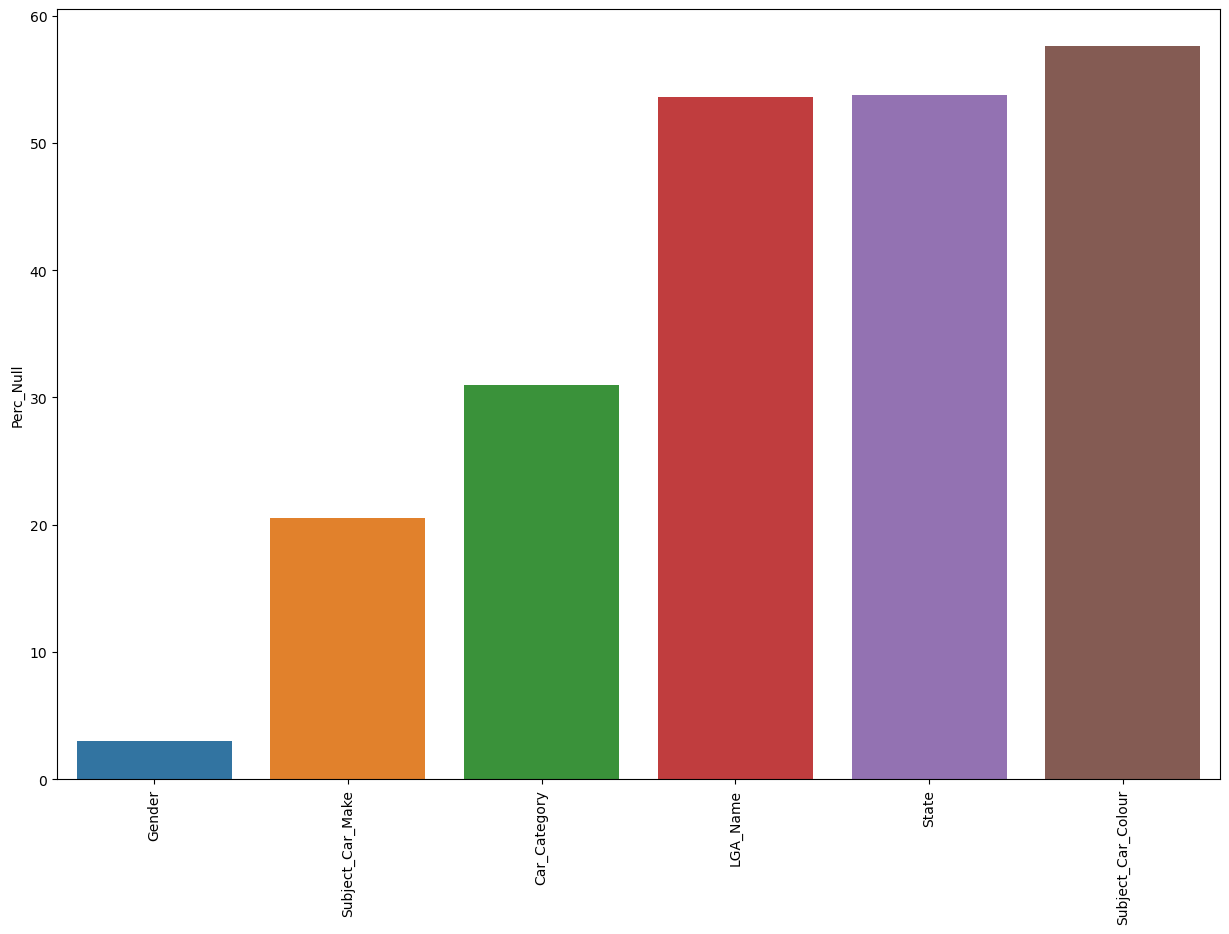

In [12]:
# Visualizing

plt.figure(figsize=(15,10))
sns.barplot(x= ddfr.index, y= ddfr['Perc_Null'])
plt.xticks(rotation=90);

In [13]:
# Checking for columns with Null values less than 5% so I can apply know the best missing value methos to apply

ddfr[ddfr['Perc_Null']<5]

,Perc_Null
Gender,2.976


### Handling the missing data for Gender column since it's Null values are less than 5%

In [14]:
# Since the Gender column is a string and not numerical, I'll fill with the missing value method (mode imputation)

data['Gender'].value_counts()

Gender
Male            7610
Female          3320
Entity           277
Joint Gender     223
NOT STATED       174
NO GENDER         66
SEX               35
Name: count, dtype: int64

In [15]:
#Filling with the most frequent category confirming

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'].isnull().sum()

0

### Handling the missing data for columns with Null values greater than 5%

In [16]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [17]:
data['Subject_Car_Make'].value_counts()

Subject_Car_Make
TOYOTA        4970
Honda         1043
Lexus          604
Mercedes       520
Hyundai        452
              ... 
ZOYTE            1
Motorcycle       1
REXTON           1
Jincheng         1
Bajaj            1
Name: count, Length: 73, dtype: int64

In [18]:
data[data['Subject_Car_Make'].isnull()][['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']]

,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Lagos,Lagos
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Ikeja,Lagos
9,NaN,NaN,NaN,Eti-Osa,Eti-Osa
...,...,...,...,...,...
12061,NaN,NaN,NaN,NaN,NaN
12063,NaN,NaN,NaN,NaN,NaN
12072,NaN,NaN,NaN,Obia/Akpor,Obia-Akpor
12075,NaN,NaN,NaN,NaN,NaN


In [19]:
#Filling with 'Missing' since the percentage of missing columns is above 5%

data[['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']] = data[['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']].fillna('Missing')
data['State'].isnull().sum()

0

In [20]:
data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,Missing,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,Missing,Missing,Missing,Missing,Missing,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,Missing,Missing,Missing,Missing,Missing,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,Male,120,2010-02-27,2,Missing,White,TOYOTA,Victoria Island,Lagos,CVTP,0


## Answering the Questions

In [21]:
# Assigning target to a variable

negative = data[data['target']>0]

positive = data[data['target']<1]

### 1. What is the distribution of the target variable?

In [22]:
zeros = data['target'][data['target']==0].count()
ones = data['target'][data['target']==1].count()
Total_count = zeros + ones

zeros_perc = round((zeros/Total_count)*100,2)
ones_perc = round((ones/Total_count)*100,2)

print(f"Target 0 occurs {zeros} times")
print(f"Target 1 occurs {ones} times")
print(f"The distribution of the target variable 0 and 1 are {zeros_perc}% and {ones_perc}% respectively")

Target 0 occurs 10612 times
Target 1 occurs 1452 times
The distribution of the target variable 0 and 1 are 87.96% and 12.04% respectively


In [23]:
# A shorter way

targ_dist = data['target'].value_counts(normalize=True)

targ_dist = pd.DataFrame(targ_dist)

targ_dist['Counts'] = data['target'].value_counts()

targ_dist['Percentage'] = (round(targ_dist['proportion']*100,2).astype(str)) + '%'

targ_dist

,proportion,Counts,Percentage
target,,,
0,0.879642,10612,87.96%
1,0.120358,1452,12.04%


In [157]:
# From the result, it can be observed that there were more possitive outcomes than negative outcomes.

### 2. Is there a significant relationship between Gender and the target variable?

#### Using crosstab function to create a contingency table

In [177]:
#Creating a contingency table

crs = pd.crosstab(data['Gender'], data['target'])
crs = crs.sort_values(by=[1,0], ascending=[False,False])
crs

target,0,1
Gender,,
Male,7008,961
Female,2964,356
Entity,183,94
Joint Gender,201,22
NO GENDER,53,13
NOT STATED,168,6
SEX,35,0


In [26]:
#Performing the Chi-Squared test (Chi2_contingency)

chi2, p, dof, expected = chi2_contingency(crs)

#
"""chi2 is Chi-Square statistics
   p is P-value
   dof is Degree of freedom
   expected is Expected outcome
"""

print(f"Chi-Square statistics: {chi2}")
print(f"P-value: {p}")

if p<0.05: #Significance level
    print("There is a statistically significant relationship between Gender and target.")
else:
    print("There is no significant relationship between Gender and target.")

Chi-Square statistics: 152.4441092086373
P-value: 2.3534653995811337e-30
There is a statistically significant relationship between Gender and target.


In [ ]:
# From the result, it can be obsereved that Male customers have the highest postive and negative outcomes, followed by female and Sex is the least. 
# Also, there is a significant relationship between the Gender and target variable. As positive outcome increases for each Gender, negative outcome increases.

### 3. How does Age of the customers correlate with the likelihood of positive or negative outcomes in the target variable?

In [27]:
r = data['Age'].corr(data['target'])
print(r)

if r<-0.1:
    print("There's a significant inverse relationship between Age and target. As Age increases, likelihood of a positive outcome decreases.")
elif r <0:
    print("There's an insignificant inverse relationship between Age and target. As Age increases, likelihood of a positive outcome minimally decreases.")
else:
    print("There's a direct relationship between Age and target. As Age increases, likelihood of a positive outcome increases.")

-0.01616180277240794
There's an insignificant inverse relationship between Age and target. As Age increases, likelihood of a positive outcome minimally decreases.


### 4.	What is the average No_Pol (number of policies) per customer

In [28]:
av_pol = data['No_Pol'].mean()
print(f"The average number of policies per customer is: {av_pol}")

The average number of policies per customer is: 1.3067805039787799


### 5.	Are there differences in policy outcomes (target) across different ProductName categories?

In [29]:
# How ProductName relates to target

pnn = data.groupby('target')['ProductName'].value_counts()

pnn =pd.DataFrame(pnn)

pnn

count
target ProductName            
0      Car Classic        5408
       CarSafe            3757
       Customized Motor    502
       Car Plus            381
       CVTP                346
       CarFlex             147
       Motor Cycle          38
       Muuve                28
       Car Vintage           5
1      Car Classic        1072
       CVTP                120
       Car Plus            103
       Muuve                65
       Customized Motor     41
       CarFlex              29
       CarSafe              14
       Motor Cycle           8

#### Verifying their relationship using chi_squared contingency

In [164]:
dpn = pd.crosstab(data['ProductName'],data['target'])
dpn = dpn.sort_values(by=[1,0], ascending=[False,False])
dpn

target,0,1
ProductName,,
Car Classic,5408,1072
CVTP,346,120
Car Plus,381,103
Muuve,28,65
Customized Motor,502,41
CarFlex,147,29
CarSafe,3757,14
Motor Cycle,38,8
Car Vintage,5,0


In [165]:
chi2, p, dof, expected = chi2_contingency(dpn)

print(f"Chi-Square statistics: {chi2}")
print(f"P-value: {p}")

if p<0.05: #Significance level
    print("There is a statistically significant relationship between target and ProductName.")
else:
    print("There is no significant relationship between target and ProductName.")

Chi-Square statistics: 1040.4215626044672
P-value: 2.8068679220521595e-219
There is a statistically significant relationship between target and ProductName.


In [166]:
dpn['Differences'] = dpn[0] - dpn[1]
dpn

target,0,1,Differences
ProductName,,,
Car Classic,5408,1072,4336
CVTP,346,120,226
Car Plus,381,103,278
Muuve,28,65,-37
Customized Motor,502,41,461
CarFlex,147,29,118
CarSafe,3757,14,3743
Motor Cycle,38,8,30
Car Vintage,5,0,5


### 6. What is the average duration between Policy Start Date and Policy End Date?

In [32]:
#Converting the format type of Policy Start Date and Policy End Date to Datetime

data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data['Policy End Date'] = pd.to_datetime(data['Policy End Date'])

#Getting the difference between both date columns to make a new column

data['Date_diff'] = data['Policy End Date'] - data['Policy Start Date']

#Getting the average of the new date column

avg_dur = data['Date_diff'].mean()

print(f"The average duration between the Policy Start Date and Policy End Date is: {avg_dur}")


The average duration between the Policy Start Date and Policy End Date is: 349 days 13:37:38.355437664


### 7.	Is there any seasonal trend in Policy Start Date (e.g., more policies starting during certain months)?

In [33]:
# Extracting the month from Policy Start Date column to form a new column named Start_Month

data['Start_Month'] = data['Policy Start Date'].dt.strftime('%b')

In [34]:
# Confirming

data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov


In [35]:
# How Start Month relates to target

smn = data.groupby('target')['Start_Month'].value_counts()

smn =pd.DataFrame(smn)

smn

count
target Start_Month       
0      Jul            999
       Jan            985
       Apr            933
       Mar            928
       Oct            912
       Dec            906
       Nov            896
       Aug            871
       Feb            856
       Sep            841
       May            795
       Jun            690
1      Jan            182
       Apr            169
       Mar            151
       Feb            139
       Jul            131
       May            123
       Nov            105
       Oct            103
       Sep             97
       Aug             95
       Jun             93
       Dec             64

In [36]:
# Using crosstab for target count comparison

trend = pd.crosstab(data['Start_Month'], data['target'])
trend

target,0,1
Start_Month,,
Apr,933,169
Aug,871,95
Dec,906,64
Feb,856,139
Jan,985,182
Jul,999,131
Jun,690,93
Mar,928,151
May,795,123


In [159]:
# Define the correct chronological order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reset index to make Start_Month a column
trend = trend.reset_index()

# Reorder rows based on the custom month order
trend['Start_Month'] = pd.Categorical(trend['Start_Month'], categories=month_order, ordered=True)
trend = trend.sort_values('Start_Month').set_index('Start_Month')

trend

target,0,1
Start_Month,,
Jan,985,182
Feb,856,139
Mar,928,151
Apr,933,169
May,795,123
Jun,690,93
Jul,999,131
Aug,871,95
Sep,841,97


### 8. Does the Car_Category affect the outcome of the target variable?

In [38]:
# How gender relates to target

cctr = data.groupby('target')['Car_Category'].value_counts()

cctr =pd.DataFrame(cctr)

cctr

count
target Car_Category                  
0      Saloon                    5213
       Missing                   3407
       JEEP                      1771
       Truck                       73
       Bus                         44
       Mini Bus                    26
       Pick Up                     22
       Motorcycle                  15
       Mini Van                    11
       Wagon                        9
       Sedan                        7
       Station 4 Wheel              5
       Shape Of Vehicle Chasis      4
       Van                          2
       CAMRY CAR HIRE               1
       Pick Up > 3 Tons             1
       Tipper Truck                 1
1      Saloon                     815
       Missing                    326
       JEEP                       247
       Truck                       24
       Mini Bus                    10
       Bus                          9
       Pick Up                      8
       Sedan                        5
       Mini Van                     2
       Motorcycle                   2
       Shape Of Vehicle Chasis      2
       Van                          1
       Wagon                        1

#### Verifying their relationship using chi_squared contingency

In [39]:
#Contingency table
ccat = pd.crosstab(data['Car_Category'], data['target'])
ccat = ccat.sort_values(by=[1,0], ascending=[False,False])
ccat

target,0,1
Car_Category,,
Saloon,5213,815
Missing,3407,326
JEEP,1771,247
Truck,73,24
Mini Bus,26,10
Bus,44,9
Pick Up,22,8
Sedan,7,5
Motorcycle,15,2


In [40]:
chi2, p, dof, expected = chi2_contingency(ccat)

print(f"Chi-Square statistics: {chi2}")
print(f"P-value: {p}")

if p<0.05: #Significance level
    print("There is a statistically significant relationship between Car_Category and target.")
else:
    print("There is no significant relationship between Car_Category and target.")

Chi-Square statistics: 96.67911280682851
P-value: 1.446568564228672e-13
There is a statistically significant relationship between Car_Category and target.


### 9.	How does Car_Make (e.g., TOYOTA, etc.) impact policy outcomes?

In [41]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month'],
      dtype='object')

In [42]:
# Crosstab

cmk = pd.crosstab(data['Subject_Car_Make'], data['target'])
cmk = cmk.sort_values(by=[1,0], ascending=[False,False])
cmk.head(10)

target,0,1
Subject_Car_Make,,
TOYOTA,4167,803
Honda,934,109
Missing,2380,94
Lexus,514,90
Mercedes,459,61
Iveco,70,50
Hyundai,404,48
Ford,238,45
Kia,307,33


In [43]:
chi2, p, dof, expected = chi2_contingency(cmk)

print(f"Chi-Square statistics: {chi2}")
print(f"P-value: {p}")

if p<0.05: #Significance level
    print("There is a statistically significant relationship between Subject_Car_Make and target.")
else:
    print("There is no significant relationship between Subject_Car_Make  and target.")

Chi-Square statistics: 435.73450083046407
P-value: 4.7117409302063735e-53
There is a statistically significant relationship between Subject_Car_Make and target.


### 10.	 Are certain car colors (Subject_Car_Colour) more prone to negative outcomes (i.e., target = 1)?

In [44]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov


In [45]:
# Recall

negative = data[data['target']>0]

positive = data[data['target']<1]

In [46]:
color_prone = negative.groupby('Subject_Car_Colour')['target'].value_counts().sort_values(ascending=False)
color_prone = pd.DataFrame(color_prone)
color_prone.head(5)

,,count
Subject_Car_Colour,target,
Missing,1,437
Black,1,282
Grey,1,126
Silver,1,119
As Attached,1,116


### 11.	 How does the No_Pol (number of policies) correlate with the customer’s age?

In [47]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov


In [48]:
core = data['No_Pol'].corr(data['Age'])
print(f"The correlation coefficient between No_Pol and Age is: {core}")

if core<-0.1:
    print("There's a significant inverse relationship between No_Pol and Age. As No_Pol increases, the Age decreases.")
elif core <0:
    print("There's an insignificant inverse relationship between No_Pol and Age. As No_Pol increases, the Age minimally decreases.")
elif core <0.05:
    print("There's an insignificant direct relationship between No_Pol and Age. As No_Pol increases, the Age minimally increases.")
else:
    print("There's a direct relationship between No_Pol and Age. As No_Pol increases, the Age increases.")

The correlation coefficient between No_Pol and Age is: 0.11080074304256403
There's a direct relationship between No_Pol and Age. As No_Pol increases, the Age increases.


### 12.	 Does LGA_Name (location) or State influence the target variable?

In [49]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month'],
      dtype='object')

In [50]:
# Crosstab

loca = pd.crosstab(data['LGA_Name'], data['target'])
loca = loca.sort_values(by=[1,0], ascending=[False,False])
loca.head(10)

target,0,1
LGA_Name,,
Missing,5967,505
Victoria Island,930,228
Ikeja,345,55
Abuja Municipal,180,52
Lagos,118,50
Surulere,242,46
Lekki,173,34
Lagos Mainland,194,28
Ibeju/Lekki,102,21


In [51]:
chi2, p, dof, expected = chi2_contingency(loca)
print(f"Chi-Square statistics: {chi2}")
print(f"P-value: {p}")
print(f"Degree of freedom: {dof}")

if p<0.05: #Significance level
    print("Yes, LGA_Name has an influence on target variable.")
else:
    print("No, LGA_Name has no influence on target variable.")

Chi-Square statistics: 804.3984033484664
P-value: 1.8839273853558708e-57
Degree of freedom: 258
Yes, LGA_Name has an influence on target variable.


### 13.	 What is the gender distribution in the dataset, and how does it relate to policy outcomes?

In [52]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov


In [53]:
# Gender distribution

gcnt = data['Gender'].value_counts(normalize=True)

gcnt = pd.DataFrame(gcnt)

gcnt['Counts'] = data['Gender'].value_counts()

gcnt['Percentage'] = (round(gcnt['proportion']*100,2).astype(str)) + '%'

gcnt

,proportion,Counts,Percentage
Gender,,,
Male,0.660560,7969,66.06%
Female,0.275199,3320,27.52%
Entity,0.022961,277,2.3%
Joint Gender,0.018485,223,1.85%
NOT STATED,0.014423,174,1.44%
NO GENDER,0.005471,66,0.55%
SEX,0.002901,35,0.29%


In [54]:
# How gender distribution relates go target

gen = data.groupby('target')['Gender'].value_counts(normalize=True)

gen =pd.DataFrame(gen)

gen = gen.rename(columns={0:"proportion"})

gen['Counts'] = data.groupby('target')['Gender'].value_counts()

gen['Percentage'] = (gen['proportion'] * 100).round(2).astype(str) + '%'

gen

proportion  Counts Percentage
target Gender                                     
0      Male            0.660384    7008     66.04%
       Female          0.279306    2964     27.93%
       Joint Gender    0.018941     201      1.89%
       Entity          0.017245     183      1.72%
       NOT STATED      0.015831     168      1.58%
       NO GENDER       0.004994      53       0.5%
       SEX             0.003298      35      0.33%
1      Male            0.661846     961     66.18%
       Female          0.245179     356     24.52%
       Entity          0.064738      94      6.47%
       Joint Gender    0.015152      22      1.52%
       NO GENDER       0.008953      13       0.9%
       NOT STATED      0.004132       6      0.41%

### 14.	 How many unique car categories are present in the dataset, and what is their distribution?

In [55]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month'],
      dtype='object')

In [56]:
# Count of unique car categories

unik = data['Car_Category'].nunique()

print(f"There are {unik} unique Car_Category present in the dataset")

There are 17 unique Car_Category present in the dataset


In [57]:
# Distribution of car categories accross the whole dataset

ccd = data['Car_Category'].value_counts(normalize=True)

ccd = pd.DataFrame(ccd)

ccd['Counts'] = data['Car_Category'].value_counts()

ccd['Percentage'] = (round(ccd['proportion']*100,2).astype(str)) + '%'

ccd

,proportion,Counts,Percentage
Car_Category,,,
Saloon,0.499668,6028,49.97%
Missing,0.309433,3733,30.94%
JEEP,0.167275,2018,16.73%
Truck,0.008040,97,0.8%
Bus,0.004393,53,0.44%
Mini Bus,0.002984,36,0.3%
Pick Up,0.002487,30,0.25%
Motorcycle,0.001409,17,0.14%
Mini Van,0.001078,13,0.11%


### 15. Does the length of time between the First Transaction Date and Policy End Date affect the outcome?

In [58]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month'],
      dtype='object')

In [59]:
#Convert neccessary timeseries cloumns from object to datetime

data['First Transaction Date'] = pd.to_datetime(data['First Transaction Date'])
data['Policy End Date'] = pd.to_datetime(data['Policy End Date'])



data['Time_length'] = data['Policy End Date'] - data['First Transaction Date']
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month,Time_length
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May,364 days
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov,364 days


In [60]:
#Extract number of days as a float in new column 

data['Length_Days'] = data['Time_length'].dt.days

In [61]:
data['Length_Days'].describe()

count    12064.000000
mean       349.567805
std        214.865415
min         12.000000
25%        364.000000
50%        364.000000
75%        364.000000
max      11139.000000
Name: Length_Days, dtype: float64

In [62]:
# Discretizing the Length_Days column since it's continous

bins = [0, 100, 200, 300, 400, 500, 1000, 15000]
rang = ['0-100', '101-200', '201-300', '301-400','401-500', '501-1000', '1001-15000']

data['Range of Days'] = pd.cut(data['Length_Days'], bins=bins, labels=rang, right=True)

In [63]:
ld = data.groupby('target')['Range of Days'].value_counts()

pd.DataFrame(ld)

count
target Range of Days       
0      301-400         9587
       101-200          501
       201-300          303
       0-100            199
       1001-15000        11
       501-1000           9
       401-500            2
1      301-400         1234
       101-200          110
       201-300           86
       0-100             21
       501-1000           1
       401-500            0
       1001-15000         0

In [64]:
cld = data['Length_Days'].corr(data['target'])
print(f"The correlation coefficient between Lenght_Days and target is: {cld}")

if cld<-0.1:
    print("There's a significant inverse relationship between Lenght_Days and target. As Lenght_Days increases, the target decreases.")
elif cld <0:
    print("There's an insignificant inverse relationship between Lenght_Days and target. As Lenght_Days increases, the target minimally decreases.")
elif cld <0.05:
    print("There's an insignificant direct relationship between Lenght_Days and target. As Lenght_Days increases, the target  minimally increases.")
else:
    print("There's a direct relationship between Lenght_Days and target. As Lenght_Days increases, the target increases.")

The correlation coefficient between Lenght_Days and target is: -0.022446751653254087
There's an insignificant inverse relationship between Lenght_Days and target. As Lenght_Days increases, the target minimally decreases.


### 16.	 Are there any notable differences in policy outcomes between Car Classic, CarSafe, and Muuve?

In [65]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May,364 days,364,301-400
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov,364 days,364,301-400


In [66]:
# Observing Notable differences in policy outcomes

prn = data.groupby('ProductName')['target'].value_counts()
prn = pd.DataFrame(prn)
prn['Proportion'] = data.groupby('ProductName')['target'].value_counts(normalize=True)
prn['Percentage'] = (prn['Proportion'] * 100).round(2).astype(str) + '%'
prn = prn.loc[['Car Classic', 'CarSafe', 'Muuve']]
prn

count  Proportion Percentage
ProductName target                              
Car Classic 0        5408    0.834568     83.46%
            1        1072    0.165432     16.54%
CarSafe     0        3757    0.996287     99.63%
            1          14    0.003713      0.37%
Muuve       1          65    0.698925     69.89%
            0          28    0.301075     30.11%

### 17.	 What percentage of the policies were for Saloon cars compared to other categories?

In [67]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month', 'Time_length',
       'Length_Days', 'Range of Days'],
      dtype='object')

In [68]:
cct = data['Car_Category'].value_counts()
cct = pd.DataFrame(cct)
cct['Proportion'] = data['Car_Category'].value_counts(normalize=True)
cct['Percentage'] = (cct['Proportion'] * 100).round(2).astype(str) + '%'
cct

,count,Proportion,Percentage
Car_Category,,,
Saloon,6028,0.499668,49.97%
Missing,3733,0.309433,30.94%
JEEP,2018,0.167275,16.73%
Truck,97,0.008040,0.8%
Bus,53,0.004393,0.44%
Mini Bus,36,0.002984,0.3%
Pick Up,30,0.002487,0.25%
Motorcycle,17,0.001409,0.14%
Mini Van,13,0.001078,0.11%


### 18.	 Is the age of the car (based on First Transaction Date) related to the target variable?

In [69]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month', 'Time_length',
       'Length_Days', 'Range of Days'],
      dtype='object')

In [70]:
#Recall that 'Length_Days' is car age

rld = data['Length_Days'].corr(data['target'])
print(f"The correlation coefficient between Lenght_Days and target is: {rld}")

if rld<-0.1:
    print("There's a significant inverse relationship between Lenght_Days and target. As Lenght_Days increases, the target decreases.")
elif rld <0:
    print("There's an insignificant inverse relationship between Lenght_Days and target. As Lenght_Days increases, the target minimally decreases.")
elif rld <0.05:
    print("There's an insignificant direct relationship between Lenght_Days and target. As Lenght_Days increases, the target  minimally increases.")
else:
    print("There's a direct relationship between Lenght_Days and target. As Lenght_Days increases, the target increases.")

The correlation coefficient between Lenght_Days and target is: -0.022446751653254087
There's an insignificant inverse relationship between Lenght_Days and target. As Lenght_Days increases, the target minimally decreases.


### 19.	 Are customers with multiple policies (No_Pol > 1) more likely to have certain outcomes?

In [71]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month', 'Time_length',
       'Length_Days', 'Range of Days'],
      dtype='object')

In [72]:
# Distribution of No_Pol greater than 1 compared to target

mltp = data.groupby(data['No_Pol']>1)['target'].value_counts()
mltp = pd.DataFrame(mltp)
mltp['Proportion'] = data.groupby(data['No_Pol']>1)['target'].value_counts(normalize=True)
mltp['Percentage'] = (mltp['Proportion'] * 100).round(2).astype(str) + '%'
mltp

count  Proportion Percentage
No_Pol target                              
False  0        8529    0.890943     89.09%
       1        1044    0.109057     10.91%
True   0        2083    0.836210     83.62%
       1         408    0.163790     16.38%

In [73]:
# Locating No_Pol > 1 = True

mltp = mltp.loc[True]
mltp

,count,Proportion,Percentage
target,,,
0,2083,0.83621,83.62%
1,408,0.16379,16.38%


### 20.	 Are there any missing values in the dataset, and if so, how are they distributed across columns?

In [76]:
# Locate all Missing

Make_Null = data[data!='Missing']
Make_Null.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,364 days,May,364 days,364,301-400
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,364 days,Nov,364 days,364,301-400
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,364 days,Mar,364 days,364,301-400
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,364 days,Aug,364 days,364,301-400
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,124 days,Aug,124 days,124,101-200


In [77]:
# Convert Missing cells back to Null

Make_Null.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3733
Subject_Car_Colour        6954
Subject_Car_Make          2474
LGA_Name                  6472
State                     6484
ProductName                  0
target                       0
Date_diff                    0
Start_Month                  0
Time_length                  0
Length_Days                  0
Range of Days                0
dtype: int64

In [78]:
# Define funtion for distribution

def perc_nan(h):
    missing = (h.isnull().sum()/len(h))*100
    perc_nan = missing[missing>0]
    
    return perc_nan

In [80]:
# Use defined funtion to find percentage distribution of Null accross the dataset

perc_missing = perc_nan(Make_Null)
perc_missing = pd.DataFrame(perc_missing)
perc_missing.rename(columns={0:'% Missing'}, inplace=True)
perc_missing

,% Missing
Car_Category,30.943302
Subject_Car_Colour,57.642573
Subject_Car_Make,20.507294
LGA_Name,53.647215
State,53.746684


In [81]:
# transposing for a better view

perc_missing.transpose()

,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State
% Missing,30.943302,57.642573,20.507294,53.647215,53.746684


# PART 2 (VISUALIZATION)

### 1. Can we visualize the distribution of Age across different policy outcomes?

In [83]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May,364 days,364,301-400
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov,364 days,364,301-400


In [84]:
# Discretizing using cut

splt = [0, 5, 12, 18, 27, 40, 70, 100, 150, 400]
agd = ['0-5', '6-12', '13-18', '19-27','28-40', '41-70', '71-100', '101-150', '150-400']

data['Age Range'] = pd.cut(data['Age'], bins=splt, labels=agd, right=True)

In [85]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days,Age Range
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,0,364 days,May,364 days,364,301-400,28-40
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,1,364 days,Nov,364 days,364,301-400,71-100


In [179]:
fr = pd.crosstab(data['Age Range'], data['target'])
fr

target,0,1
Age Range,,
0-5,319,19
6-12,156,33
13-18,12,7
19-27,483,91
28-40,4174,716
41-70,4847,487
71-100,320,22
101-150,287,76
150-400,11,1


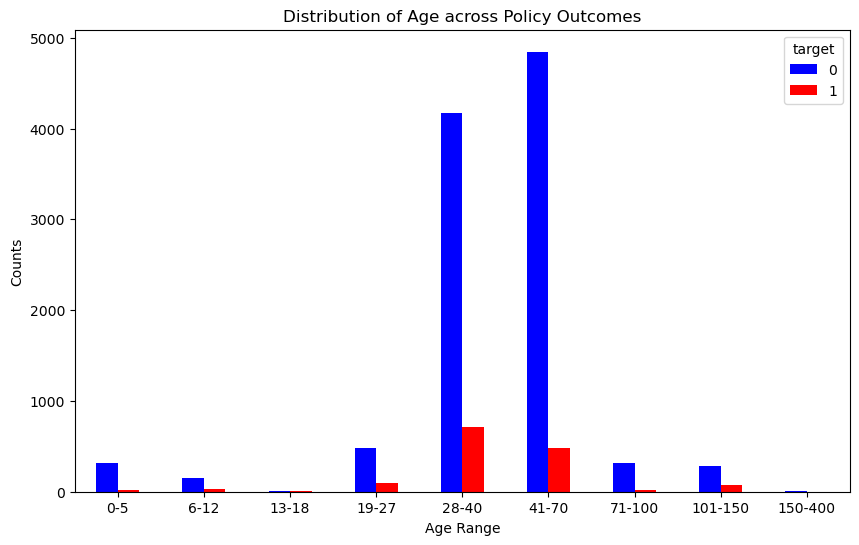

In [183]:
# Plotting stacked bar plot
fr.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Counts')
plt.title('Distribution of Age across Policy Outcomes')
plt.xticks(rotation=0);

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureW

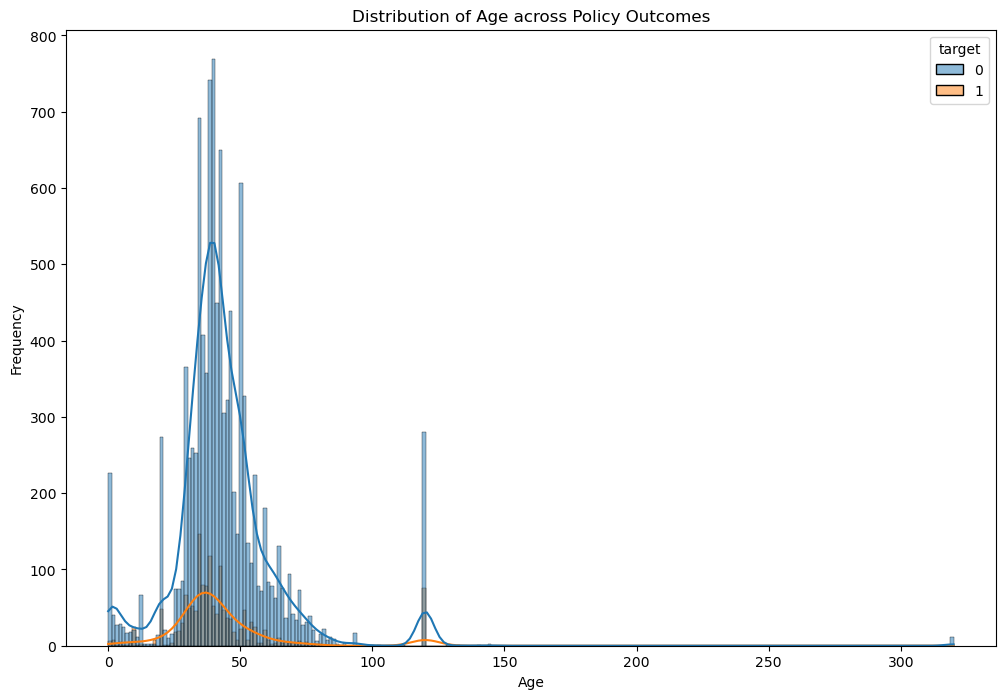

In [190]:
# We can also do it this way

plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Age', hue='target', kde=True)
plt.title('Distribution of Age across Policy Outcomes')
plt.xlabel('Age')
plt.ylabel('Frequency');

### 2. How does the count of different car categories (Car_Category) break down by policy outcome?

In [191]:
data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days,Age Range,Geo Location
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,...,Missing,Car Classic,0,364 days,May,364 days,364,301-400,28-40,Missing
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,...,Missing,Car Classic,1,364 days,Nov,364 days,364,301-400,71-100,Missing


In [96]:
#using crosstab
locas = pd.crosstab(data['Car_Category'],data['target'])
locas

target,0,1
Car_Category,,
Bus,44,9
CAMRY CAR HIRE,1,0
JEEP,1771,247
Mini Bus,26,10
Mini Van,11,2
Missing,3407,326
Motorcycle,15,2
Pick Up,22,8
Pick Up > 3 Tons,1,0


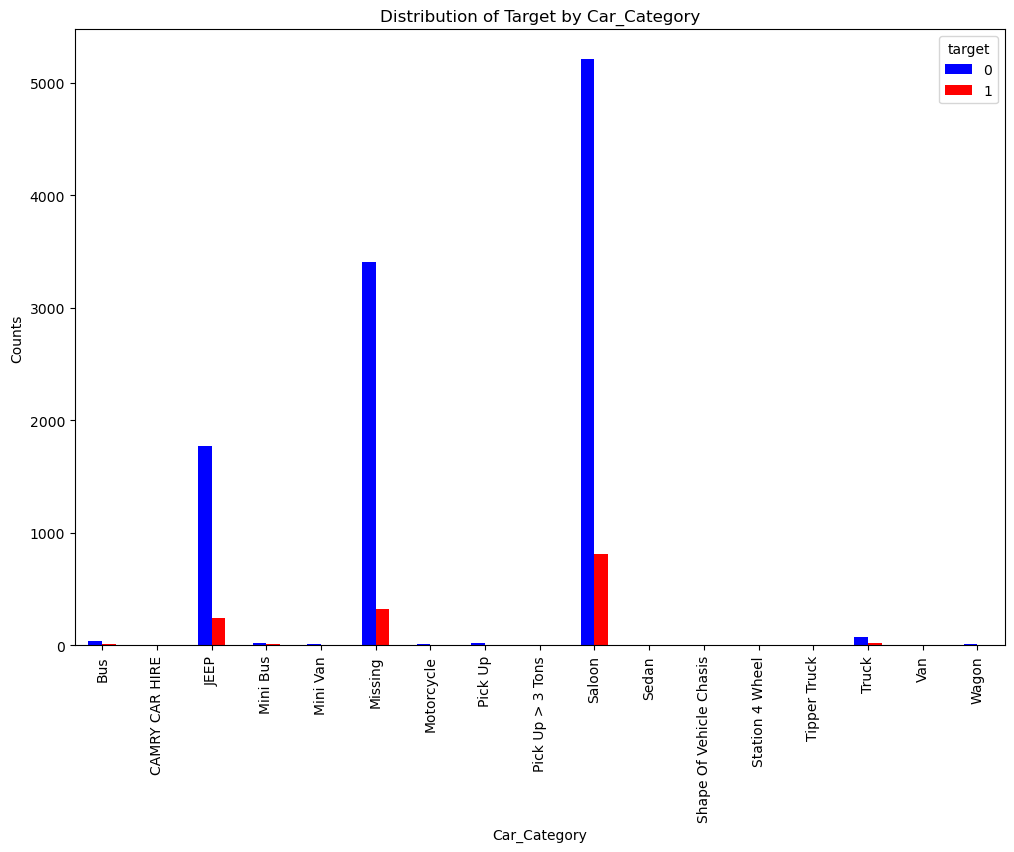

In [104]:
# Plotting stacked bar plot
locas.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(12, 8))
plt.xticks(rotation=0)

# Adding labels and title
plt.ylabel('Counts')
plt.title('Distribution of Target by Car_Category')
plt.xticks(rotation=90);

### Zooming

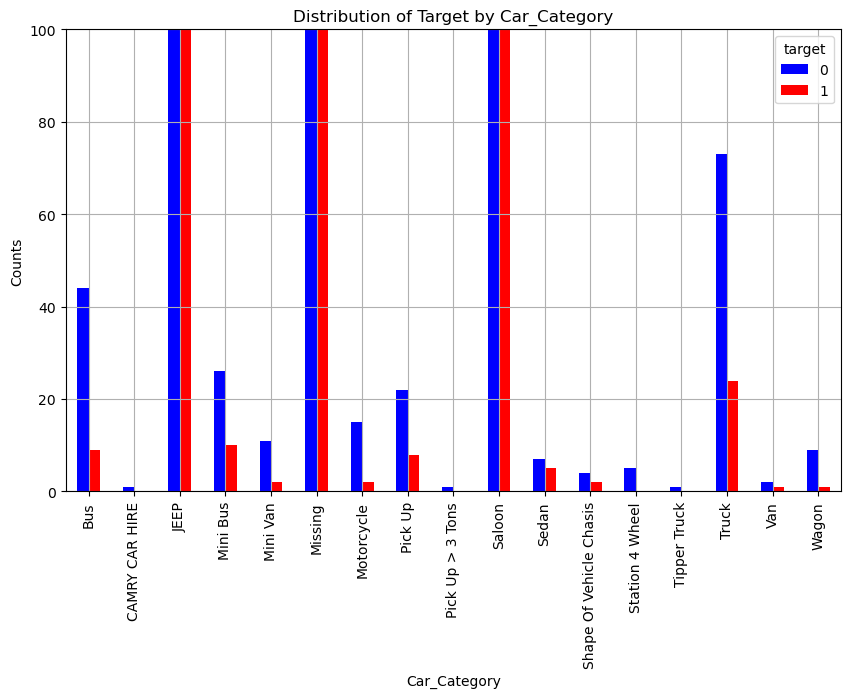

In [105]:
# Plotting stacked bar plot
locas.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))
plt.xticks(rotation=0)

# Adding labels and title
plt.ylabel('Counts')
plt.title('Distribution of Target by Car_Category')
plt.xticks(rotation=90);
plt.ylim(0,100) #Zooming
plt.grid(True);

In [192]:
# Or we can do it this way

gh = pd.DataFrame(data.groupby('target')['Car_Category'].value_counts())
gh

count
target Car_Category                  
0      Saloon                    5213
       Missing                   3407
       JEEP                      1771
       Truck                       73
       Bus                         44
       Mini Bus                    26
       Pick Up                     22
       Motorcycle                  15
       Mini Van                    11
       Wagon                        9
       Sedan                        7
       Station 4 Wheel              5
       Shape Of Vehicle Chasis      4
       Van                          2
       CAMRY CAR HIRE               1
       Pick Up > 3 Tons             1
       Tipper Truck                 1
1      Saloon                     815
       Missing                    326
       JEEP                       247
       Truck                       24
       Mini Bus                    10
       Bus                          9
       Pick Up                      8
       Sedan                        5
       Mini Van                     2
       Motorcycle                   2
       Shape Of Vehicle Chasis      2
       Van                          1
       Wagon                        1

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


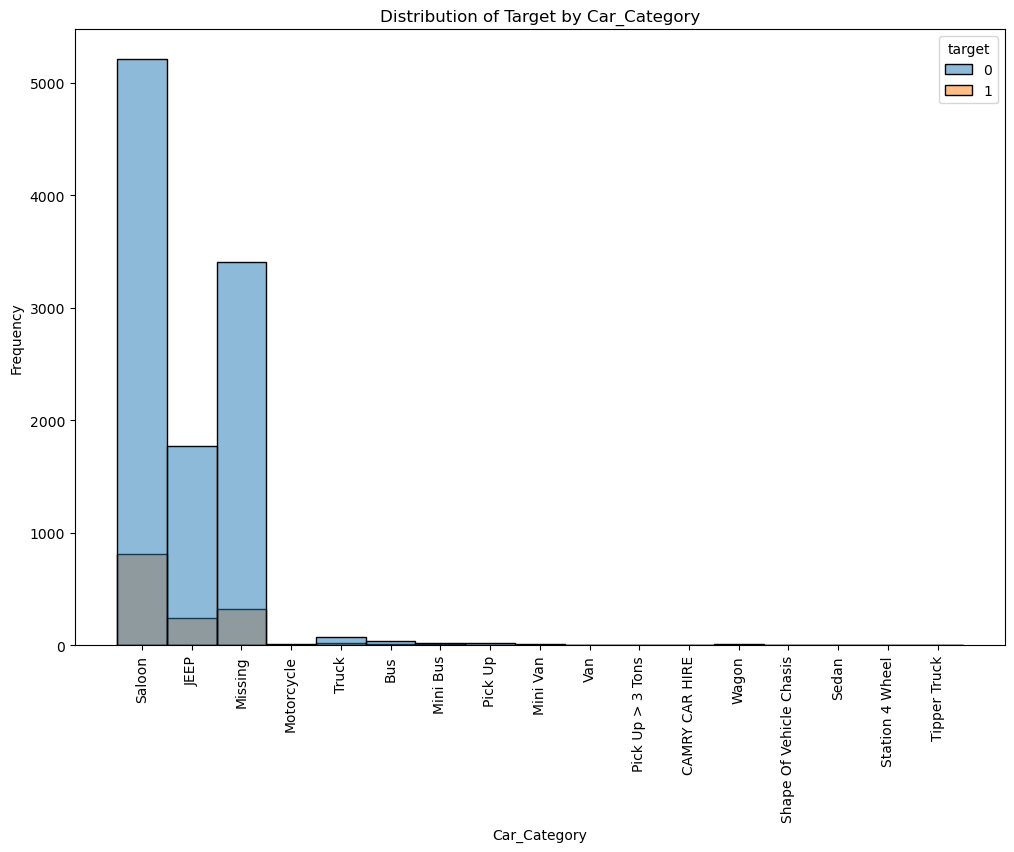

In [195]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Car_Category', hue='target')
plt.title('Distribution of Target by Car_Category');
plt.ylabel('Frequency')
plt.xticks(rotation=90);

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


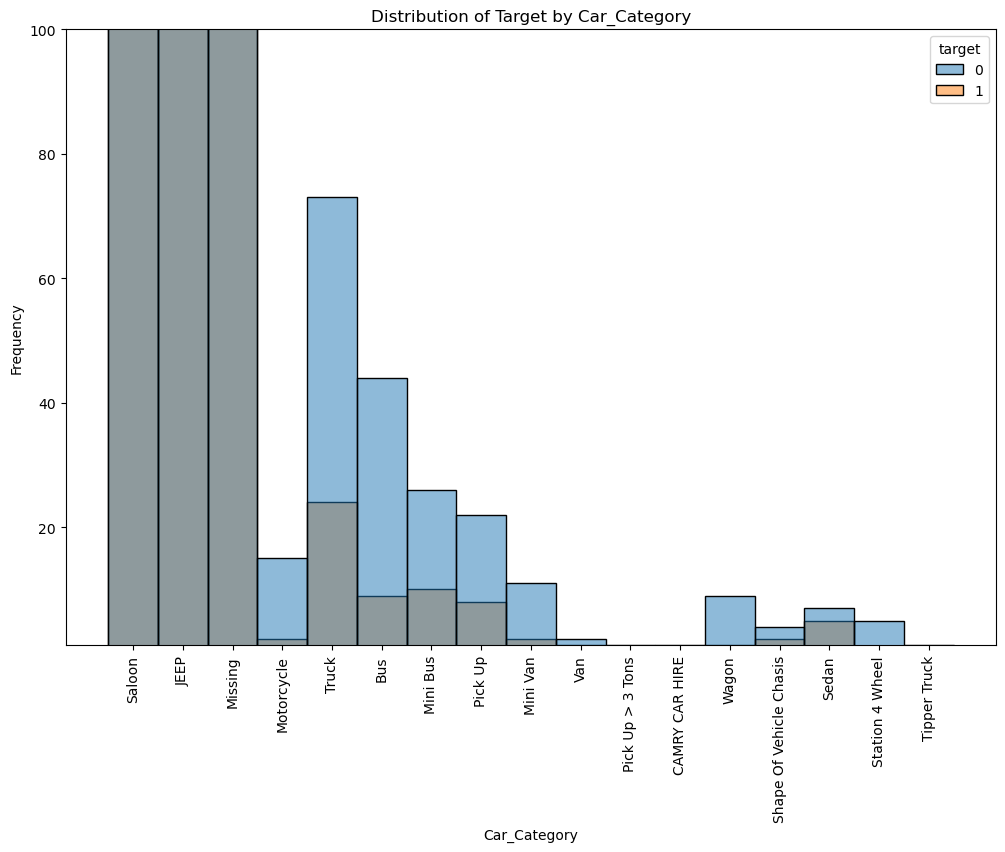

In [194]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Car_Category', hue='target')

plt.title('Distribution of Target by Car_Category');
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.ylim(1,100); # Zooming

### 3. Can we visualize the number of policies (No_Pol) by Gender?

In [196]:
gend = pd.crosstab(data['Gender'], data['target'])
gend

target,0,1
Gender,,
Entity,183,94
Female,2964,356
Joint Gender,201,22
Male,7008,961
NO GENDER,53,13
NOT STATED,168,6
SEX,35,0


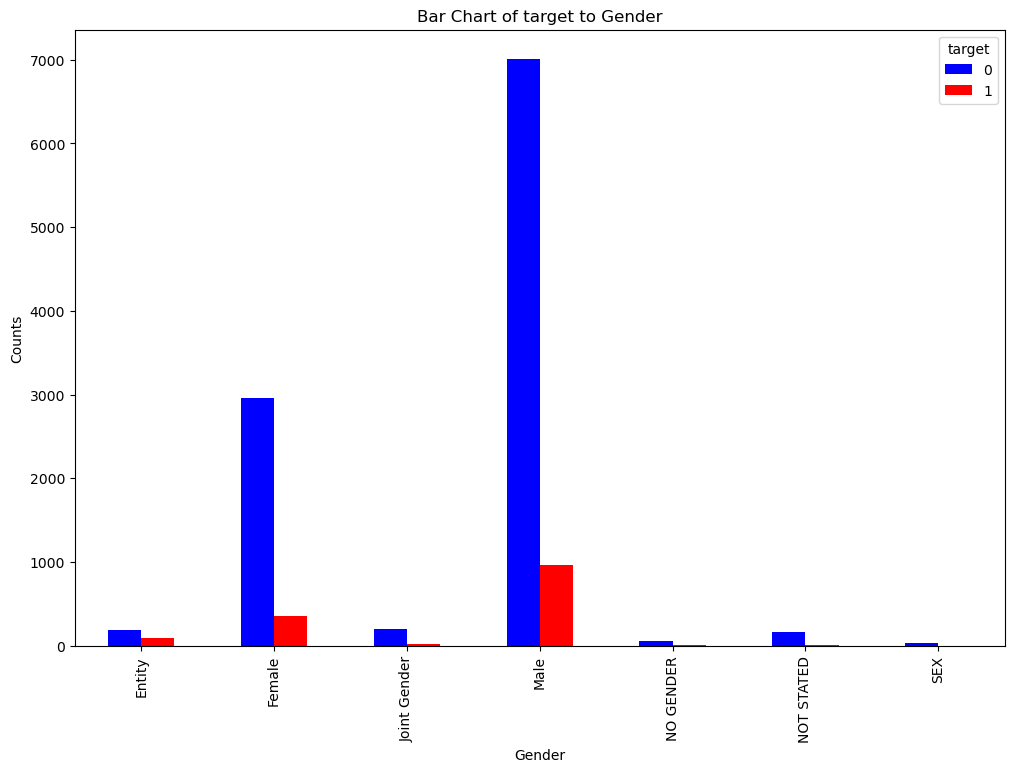

In [197]:
gend.plot(kind='bar', color=['blue','red'], stacked=False, figsize=(12,8))

#labeling
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Bar Chart of target to Gender');

### Zooming

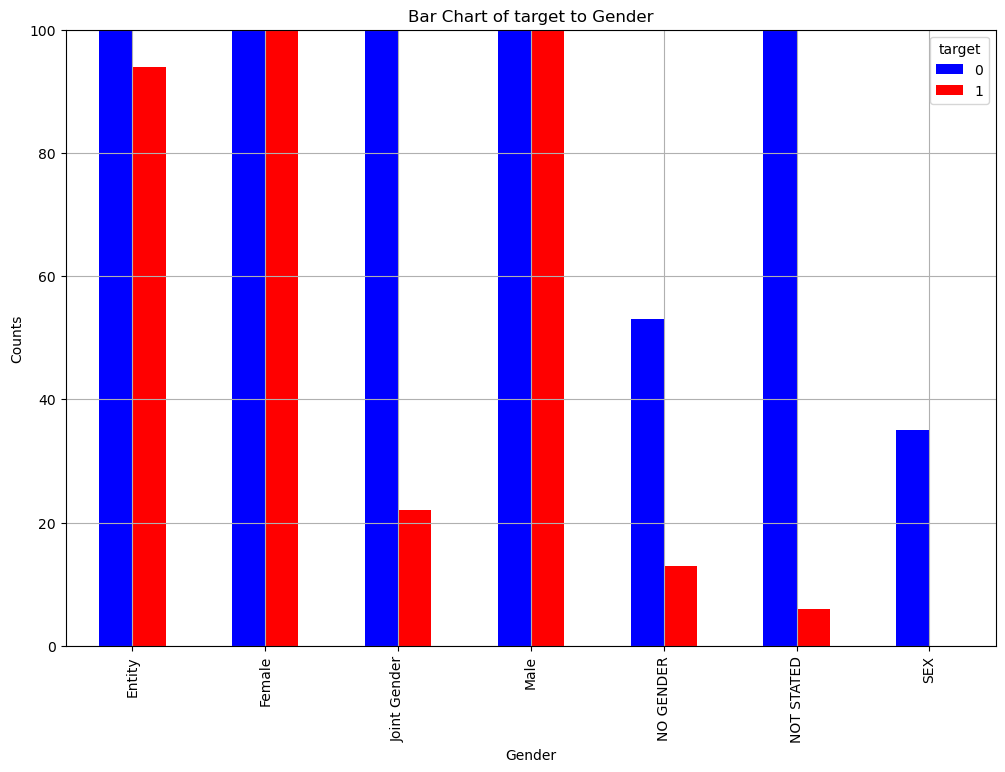

In [198]:
gend.plot(kind='bar', color=['blue','red'], stacked=False, figsize=(12,8))

#labeling
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Bar Chart of target to Gender')
plt.ylim(0,100)
plt.grid(True); #zooming

### 4. What is the monthly trend for the start date of policies (Policy Start Date)?

In [199]:
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days,Age Range,Geo Location
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,...,Missing,Car Classic,0,364 days,May,364 days,364,301-400,28-40,Missing
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,...,Missing,Car Classic,1,364 days,Nov,364 days,364,301-400,71-100,Missing
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,...,Missing,Car Classic,0,364 days,Mar,364 days,364,301-400,41-70,Missing
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Missing,Missing,Missing,...,Missing,CarSafe,0,364 days,Aug,364 days,364,301-400,0-5,Missing
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Missing,Missing,Missing,...,Lagos,Muuve,1,124 days,Aug,124 days,124,101-200,19-27,South-West


In [200]:
data['Start_Month'] = data['Policy Start Date'].dt.strftime('%b')

In [201]:
stm = pd.crosstab(data['Start_Month'], data['target'])
stm

target,0,1
Start_Month,,
Apr,933,169
Aug,871,95
Dec,906,64
Feb,856,139
Jan,985,182
Jul,999,131
Jun,690,93
Mar,928,151
May,795,123


In [202]:
# Defining the correct chronological order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reset index to make Start_Month a column
stm = stm.reset_index()

# Reorder rows based on the custom month order
stm['Start_Month'] = pd.Categorical(stm['Start_Month'], categories=month_order, ordered=True)
stm = stm.sort_values('Start_Month').set_index('Start_Month')

stm


target,0,1
Start_Month,,
Jan,985,182
Feb,856,139
Mar,928,151
Apr,933,169
May,795,123
Jun,690,93
Jul,999,131
Aug,871,95
Sep,841,97


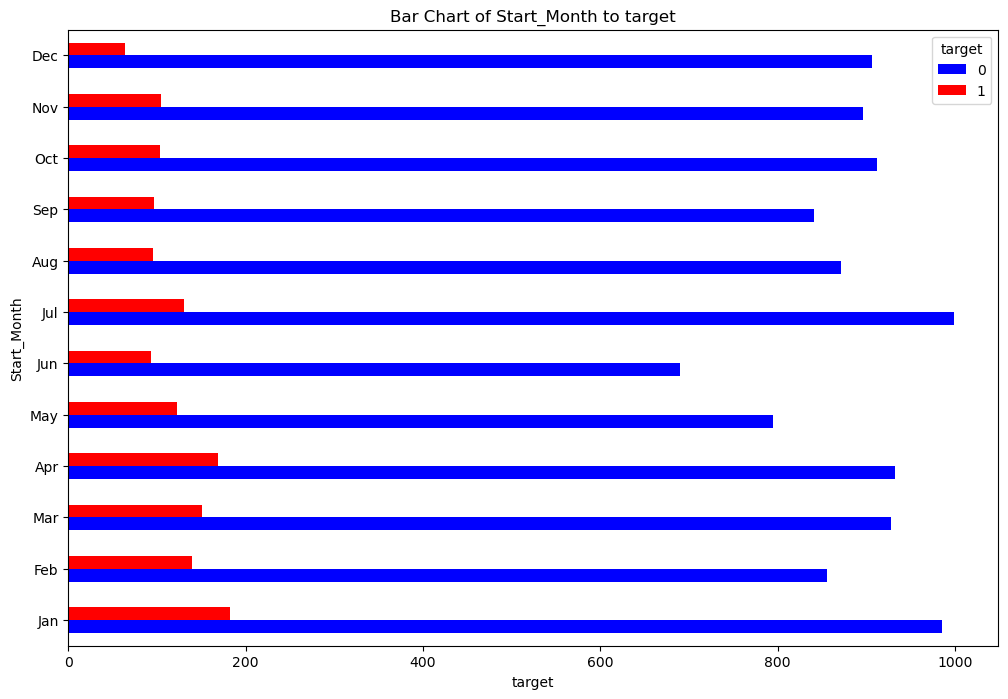

In [232]:
stm.plot(kind='barh', stacked=False, color=['blue','red'], figsize=(12,8))

#labeling
plt.xlabel('target')
plt.ylabel('Start_Month')
plt.title('Bar Chart of Start_Month to target');

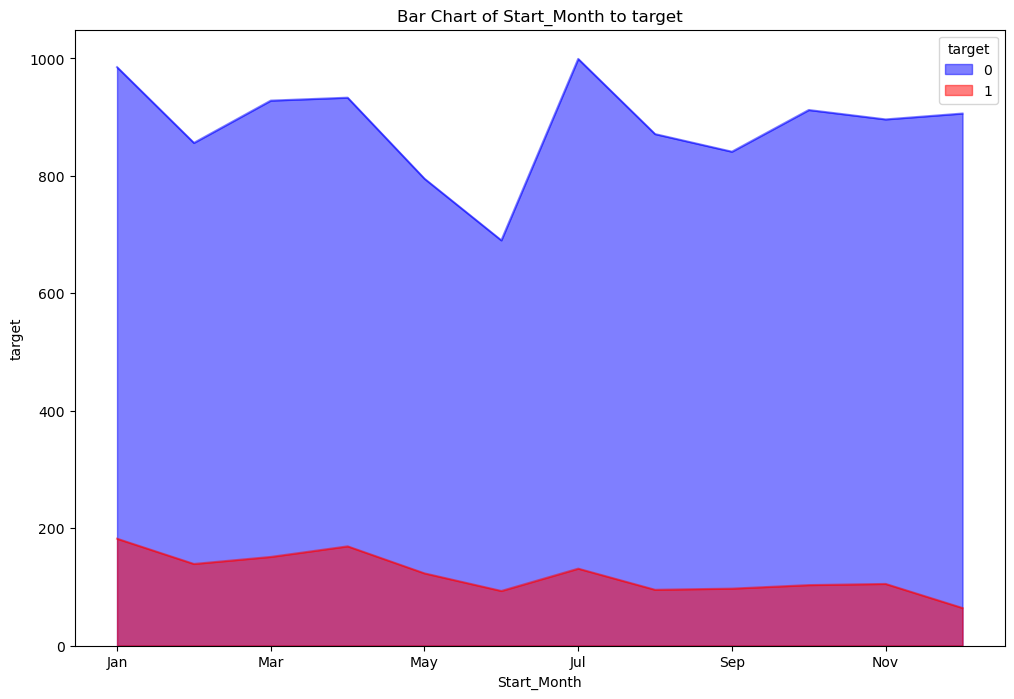

In [234]:
stm.plot(kind='area', stacked=False, color=['blue','red'], figsize=(12,8))

#labeling
plt.xlabel('Start_Month')
plt.ylabel('target')
plt.title('Bar Chart of Start_Month to target');

### 5. Can we create a bar chart showing the number of policies by ProductName?

In [205]:
prdnm = pd.crosstab(data['ProductName'], data['target'])
prdnm

target,0,1
ProductName,,
CVTP,346,120
Car Classic,5408,1072
Car Plus,381,103
Car Vintage,5,0
CarFlex,147,29
CarSafe,3757,14
Customized Motor,502,41
Motor Cycle,38,8
Muuve,28,65


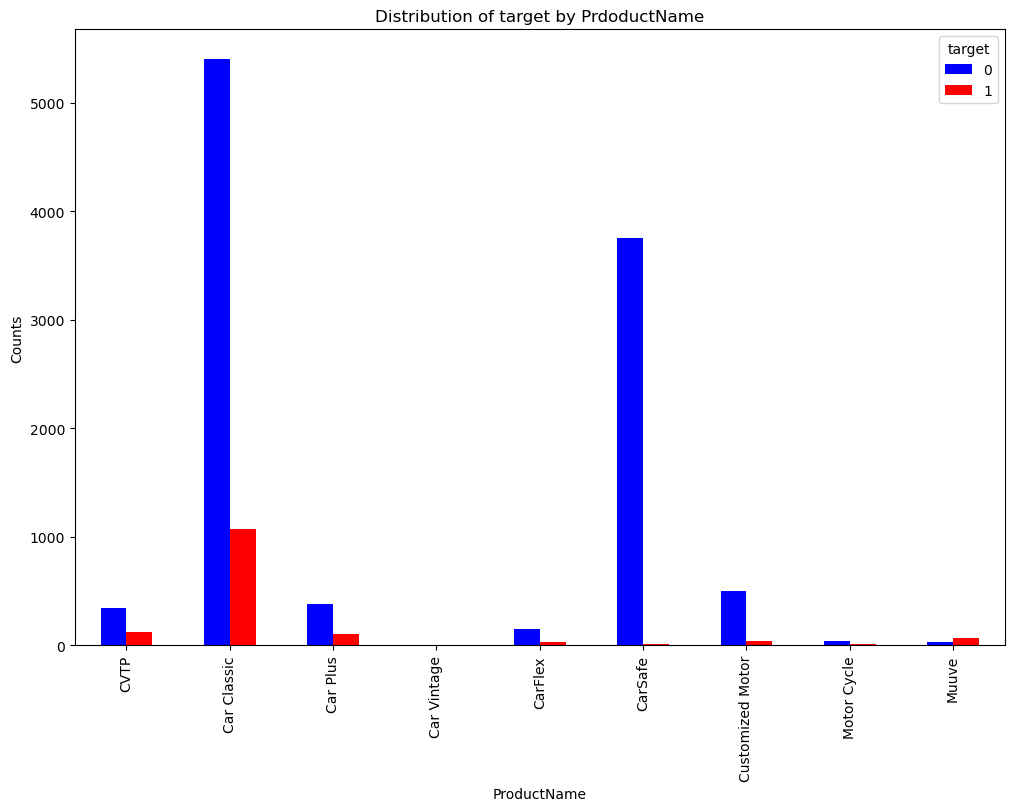

In [206]:
prdnm.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(12,8))
plt.ylabel('Counts')
plt.title('Distribution of target by PrdoductName');

### Zooming

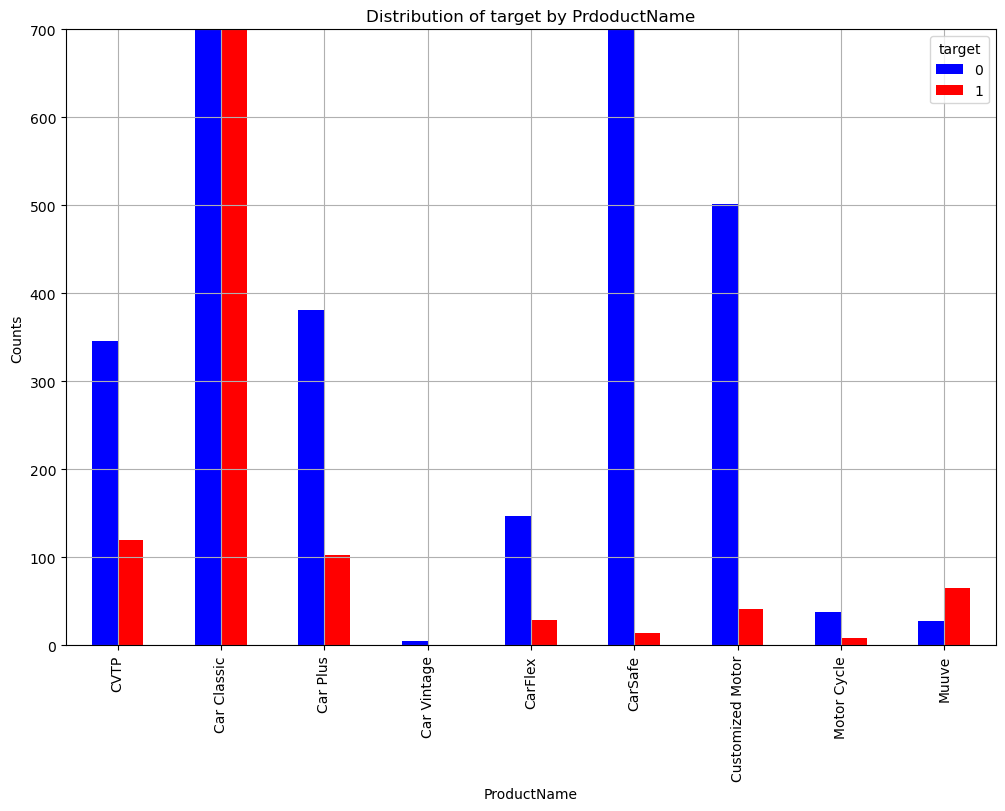

In [207]:
prdnm.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(12,8))
plt.ylabel('Counts')
plt.title('Distribution of target by PrdoductName')
plt.ylim(0,700)
plt.grid(True);

### 6. How does Car_Make distribution vary across the target variable?

In [208]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month', 'Time_length',
       'Length_Days', 'Range of Days', 'Age Range', 'Geo Location'],
      dtype='object')

In [209]:
crmk = pd.crosstab(data['Subject_Car_Make'], data['target'])
crmk

target,0,1
Subject_Car_Make,,
.,30,14
ABG,1,0
ACURA,58,7
As Attached,6,5
Ashok Leyland,1,0
...,...,...
Volkswagen,117,5
Volvo,29,8
Wrangler Jeep,2,0


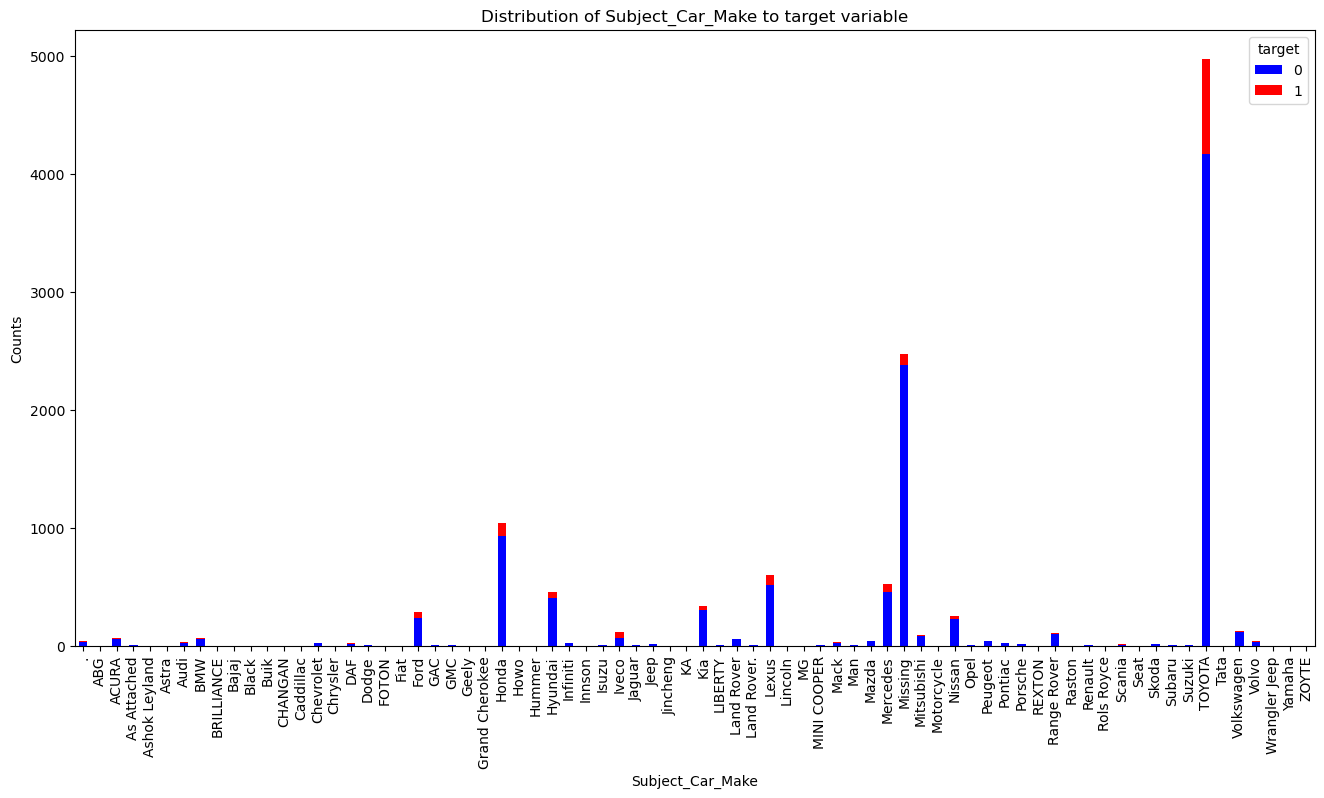

In [210]:
crmk.plot(kind='bar', stacked=True, color=['blue','red'], figsize=(16,8))
plt.ylabel('Counts')
plt.title('Distribution of Subject_Car_Make to target variable');

### Zooming

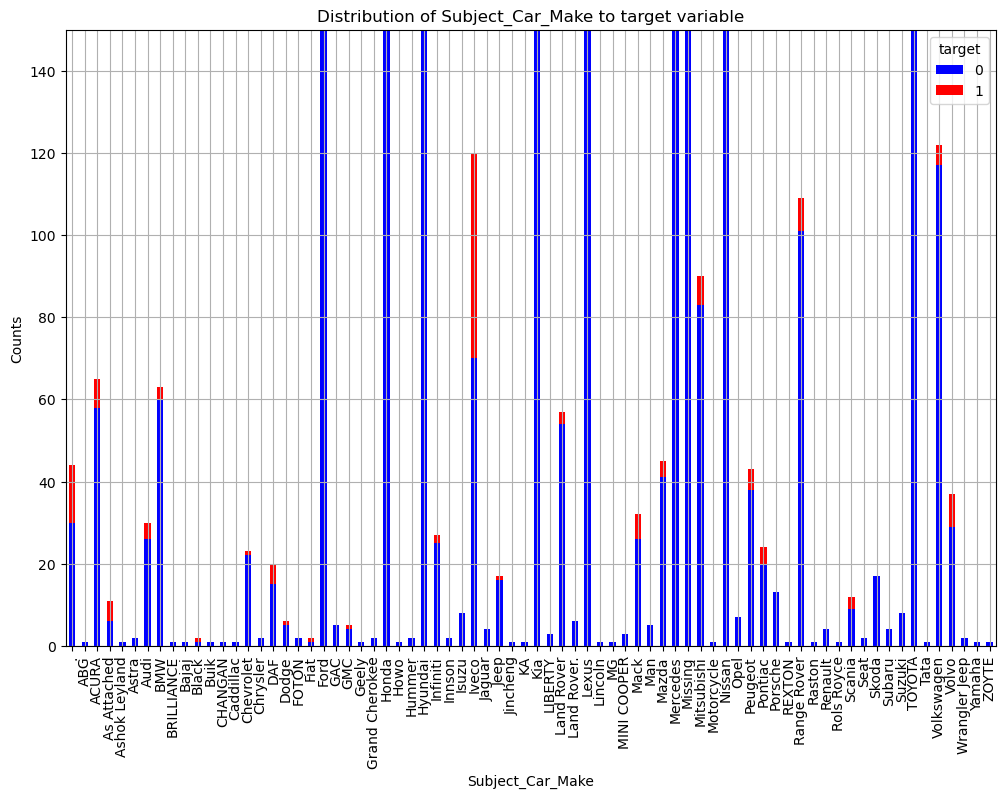

In [211]:
crmk.plot(kind='bar', stacked=True, color=['blue','red'], figsize=(12,8))
plt.ylabel('Counts')
plt.title('Distribution of Subject_Car_Make to target variable')
plt.ylim(0,150)
plt.grid(True);

### 7. Can we visualize the geographic distribution of policies by State?

In [212]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month', 'Time_length',
       'Length_Days', 'Range of Days', 'Age Range', 'Geo Location'],
      dtype='object')

In [213]:
print(data['State'].unique())

['Missing' 'Lagos' 'Benue' 'Eti-Osa' 'Delta' 'Ogun' 'Abuja-Municipal'
 'Oshodi-Isolo' 'Ibeju-Lekki' 'Ibadan-West' 'Obia-Akpor' 'Ibadan-East'
 'Kaduna-South' 'Amuwo-Odofin' 'Anambra' 'Rivers' 'Niger-State' 'Edo'
 'Akwa-Ibom' 'ENUGU-EAST' 'Abuja' 'Kaduna' 'Esan-West' 'Obafemi-Owode'
 'Orile-Iganmu' 'Ifako-Ijaye' 'Ibadan-North' 'Imo' 'Jos-North' 'Ondo-West'
 'Kaduna-North' 'Aniocha-South' 'Awka-South' 'Ile-Oluji' 'Ijebu-Ode'
 'Port-Harcourt' 'Nnewi-North' 'Aboh-Mbaise' 'Oyo' 'Akoko-West'
 'Warri-Central' 'Cross-River' 'Jos-South' 'Onitsha-North' 'Osun'
 'Ajeromi-Ifelodun' 'Kano-Municipal' 'Ife-Central' 'Ilorin-West'
 'Lagelu-North' 'Owerri-Municipal' 'Nsit-Ubium' 'Udi-Agwu' 'Essien-Udim'
 'Owerri-West' 'Ondo' 'Ogbmosho-South' 'Umuahia-South' 'ABULE-EGBA'
 'Enugu-North' 'Ovia-SouthWest' 'Kebbi' 'Ajegunle-State' 'Ekiti-West'
 'Ogun-Waterside' 'Ife-North' 'Anambra-East' 'Nasarawa' 'Etsako-West'
 'Kwara' 'Aba-North' 'Awka-North' 'Ibarapa-Central' 'Idemili-North'
 'Ogba-Ndoni' 'Calabar-Municip

In [214]:
stpl= pd.crosstab(data['State'], data['target'])
stpl

target,0,1
State,,
ABULE-EGBA,5,1
AJAO-ESTATE,2,0
Aba-North,3,0
Aba-South,1,0
Abia,2,0
...,...,...
Ughelli-North,1,0
Umuahia-South,2,0
Warri-Central,23,4


In [215]:
data['State'].nunique()

112

In [216]:
# Define the cardinal direction regions
south_west_states = ['Lagos', 'Ogun', 'Eti-Osa', 'Oshodi-Isolo', 'Ibeju-Lekki', 'Ibadan-West', 'Ibadan-East', 'Amuwo-Odofin', 'Ifako-Ijaye', 'Ibadan-North', 'Ogun-Waterside', 'Ife-North', 'Ife-Central', 'Ile-Oluji', 'Ijebu-Ode', 'Ijebu-East', 'Lagelu-North', 'Ajao-Estate', 'Ijebu-North']
south_south_states = ['Delta', 'Rivers', 'Akwa-Ibom', 'Cross-River', 'Bayelsa', 'Edo', 'Esan-West', 'Obafemi-Owode', 'Warri-Central', 'Warri-North', 'Warri-South', 'Ughelli-North', 'Ethiope-East', 'Isoko-south', 'Isoko-North', 'Aba-North', 'Aba-South', 'Oshimili-North', 'Ado-Ota']
south_east_states = ['Anambra', 'Enugu-EAST', 'Imo', 'Ebonyi', 'Abia', 'Aniocha-South', 'Awka-South', 'Awka-North', 'Onitsha-North', 'Onitsha-South', 'Nsit-Ubium', 'Udi-Agwu', 'Aboh-Mbaise', 'Umuahia-South', 'Idemili-North', 'Nnewi-North', 'Nnewi-South', 'Ndokwa-East', 'Isoko-North', 'Isoko-south']
north_west_states = ['Kaduna-South', 'Kaduna-North', 'Kano-Municipal', 'Kano', 'Bauchi', 'Gombe', 'Kwara', 'Nasarawa', 'Kebbi']
north_east_states = ['Jos-North', 'Jos-South', 'Portharcourt', 'Aba-South', 'Etsako-West', 'Ogba-Ndoni', 'Gombe', 'Kogi', 'Kebbi']
north_central_states = ['Benue', 'Kaduna', 'Abuja', 'Kwara', 'Kogi', 'Niger-State', 'Ekiti-West', 'Ekiti-East', 'Ajao-Estate', 'Owerri-West', 'Central-Abuja', 'Ilesha-East', 'Ilesha-West', 'Esan-Central', 'Kebbi']

# Create a function to map states to their geographical locations
def assign_geographical_location(state):
    if state in south_west_states:
        return 'South-West'
    elif state in south_south_states:
        return 'South-South'
    elif state in south_east_states:
        return 'South-East'
    elif state in north_west_states:
        return 'North-West'
    elif state in north_east_states:
        return 'North-East'
    elif state in north_central_states:
        return 'North-Central'
    else:
        return 'Missing'

# Creating new categorical column for geographical location
data['Geo Location'] = data['State'].apply(assign_geographical_location)

data.sample(7)


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,State,ProductName,target,Date_diff,Start_Month,Time_length,Length_Days,Range of Days,Age Range,Geo Location
9722,ID_T459AC5,2010-06-16,2011-06-15,Female,42,2010-06-16,3,Missing,Missing,Nissan,...,Lagos,Car Classic,0,364 days,Jun,364 days,364,301-400,41-70,South-West
4608,ID_DTTVX0H,2010-03-27,2011-03-26,Female,50,2010-03-27,1,JEEP,As Attached,Lexus,...,Obia-Akpor,Car Plus,0,364 days,Mar,364 days,364,301-400,41-70,Missing
11696,ID_YW9B2BV,2010-03-01,2011-03-01,Male,44,2010-03-01,1,Saloon,Missing,Nissan,...,Missing,CarSafe,0,365 days,Mar,365 days,365,301-400,41-70,Missing
4691,ID_E2QJ4S9,2010-07-04,2011-07-03,Male,50,2010-07-04,1,Saloon,Missing,Honda,...,Missing,CarSafe,0,364 days,Jul,364 days,364,301-400,41-70,Missing
8040,ID_O7SYXMO,2010-12-04,2011-03-17,Male,34,2010-12-04,2,Saloon,Silver,TOYOTA,...,Benue,Car Plus,1,103 days,Dec,103 days,103,101-200,28-40,North-Central
3579,ID_ANCNHXD,2010-11-09,2011-10-25,Male,38,2010-11-09,1,Missing,Missing,Lexus,...,Eti-Osa,Car Classic,0,350 days,Nov,350 days,350,301-400,28-40,South-West
3757,ID_B6KIEI6,2010-04-29,2011-04-28,Male,10,2010-04-29,1,Saloon,Missing,TOYOTA,...,Missing,CarSafe,0,364 days,Apr,364 days,364,301-400,6-12,Missing


In [217]:
data['Geo Location'].nunique()

7

In [218]:
geoloc = pd.crosstab(data['Geo Location'], data['target'])
geoloc

target,0,1
Geo Location,,
Missing,6406,599
North-Central,602,135
North-East,25,6
North-West,42,5
South-East,81,2
South-South,223,58
South-West,3233,647


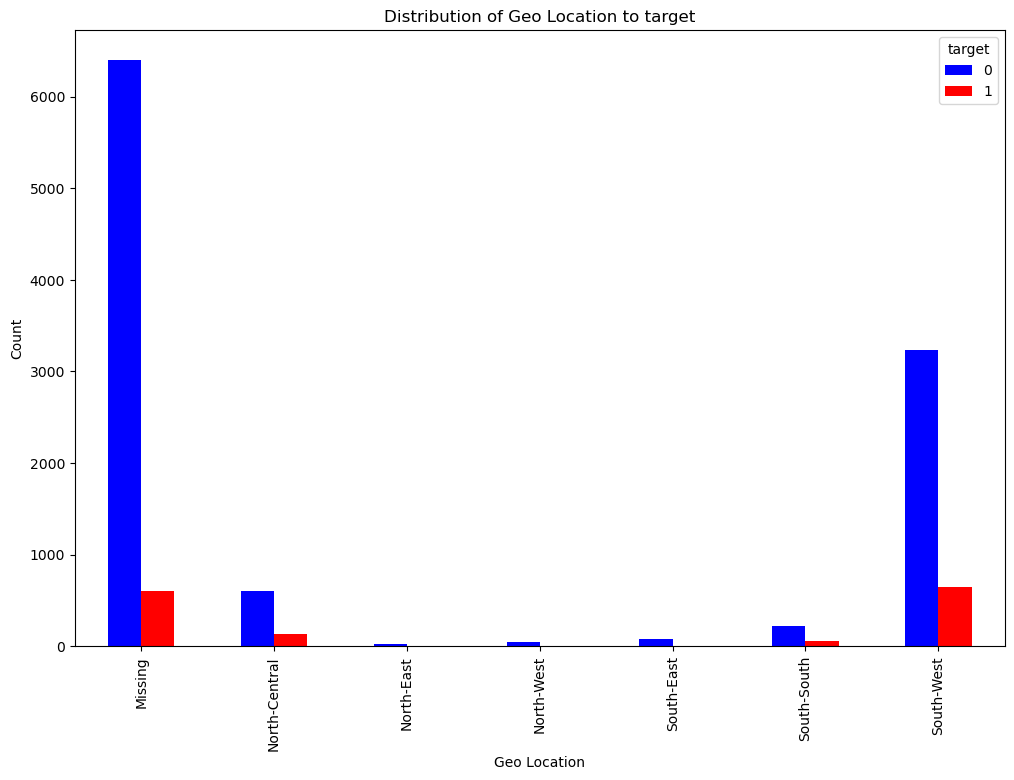

In [219]:
geoloc.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(12,8))
plt.ylabel('Count')
plt.title('Distribution of Geo Location to target');

### Zooming

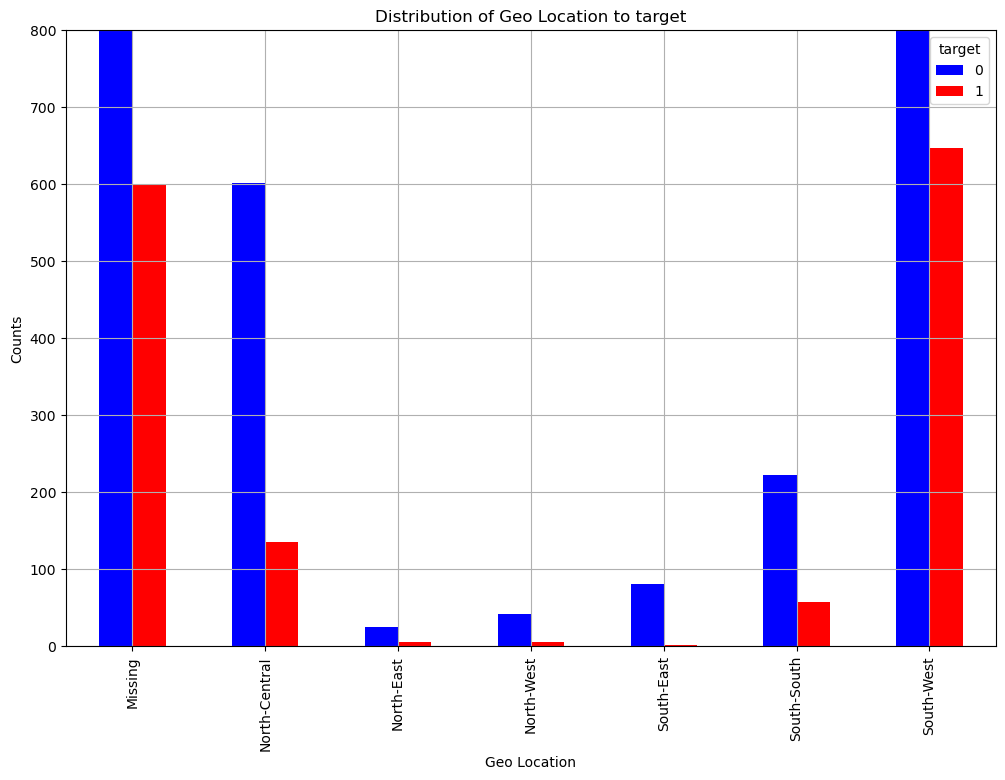

In [220]:
geoloc.plot(kind='bar', stacked=False, color=['blue','red'], figsize=(12,8))
plt.ylabel('Counts')
plt.title('Distribution of Geo Location to target')
plt.ylim(0,800)
plt.grid(True);

### 8. What is the relationship between No_Pol and Age in a scatter plot?

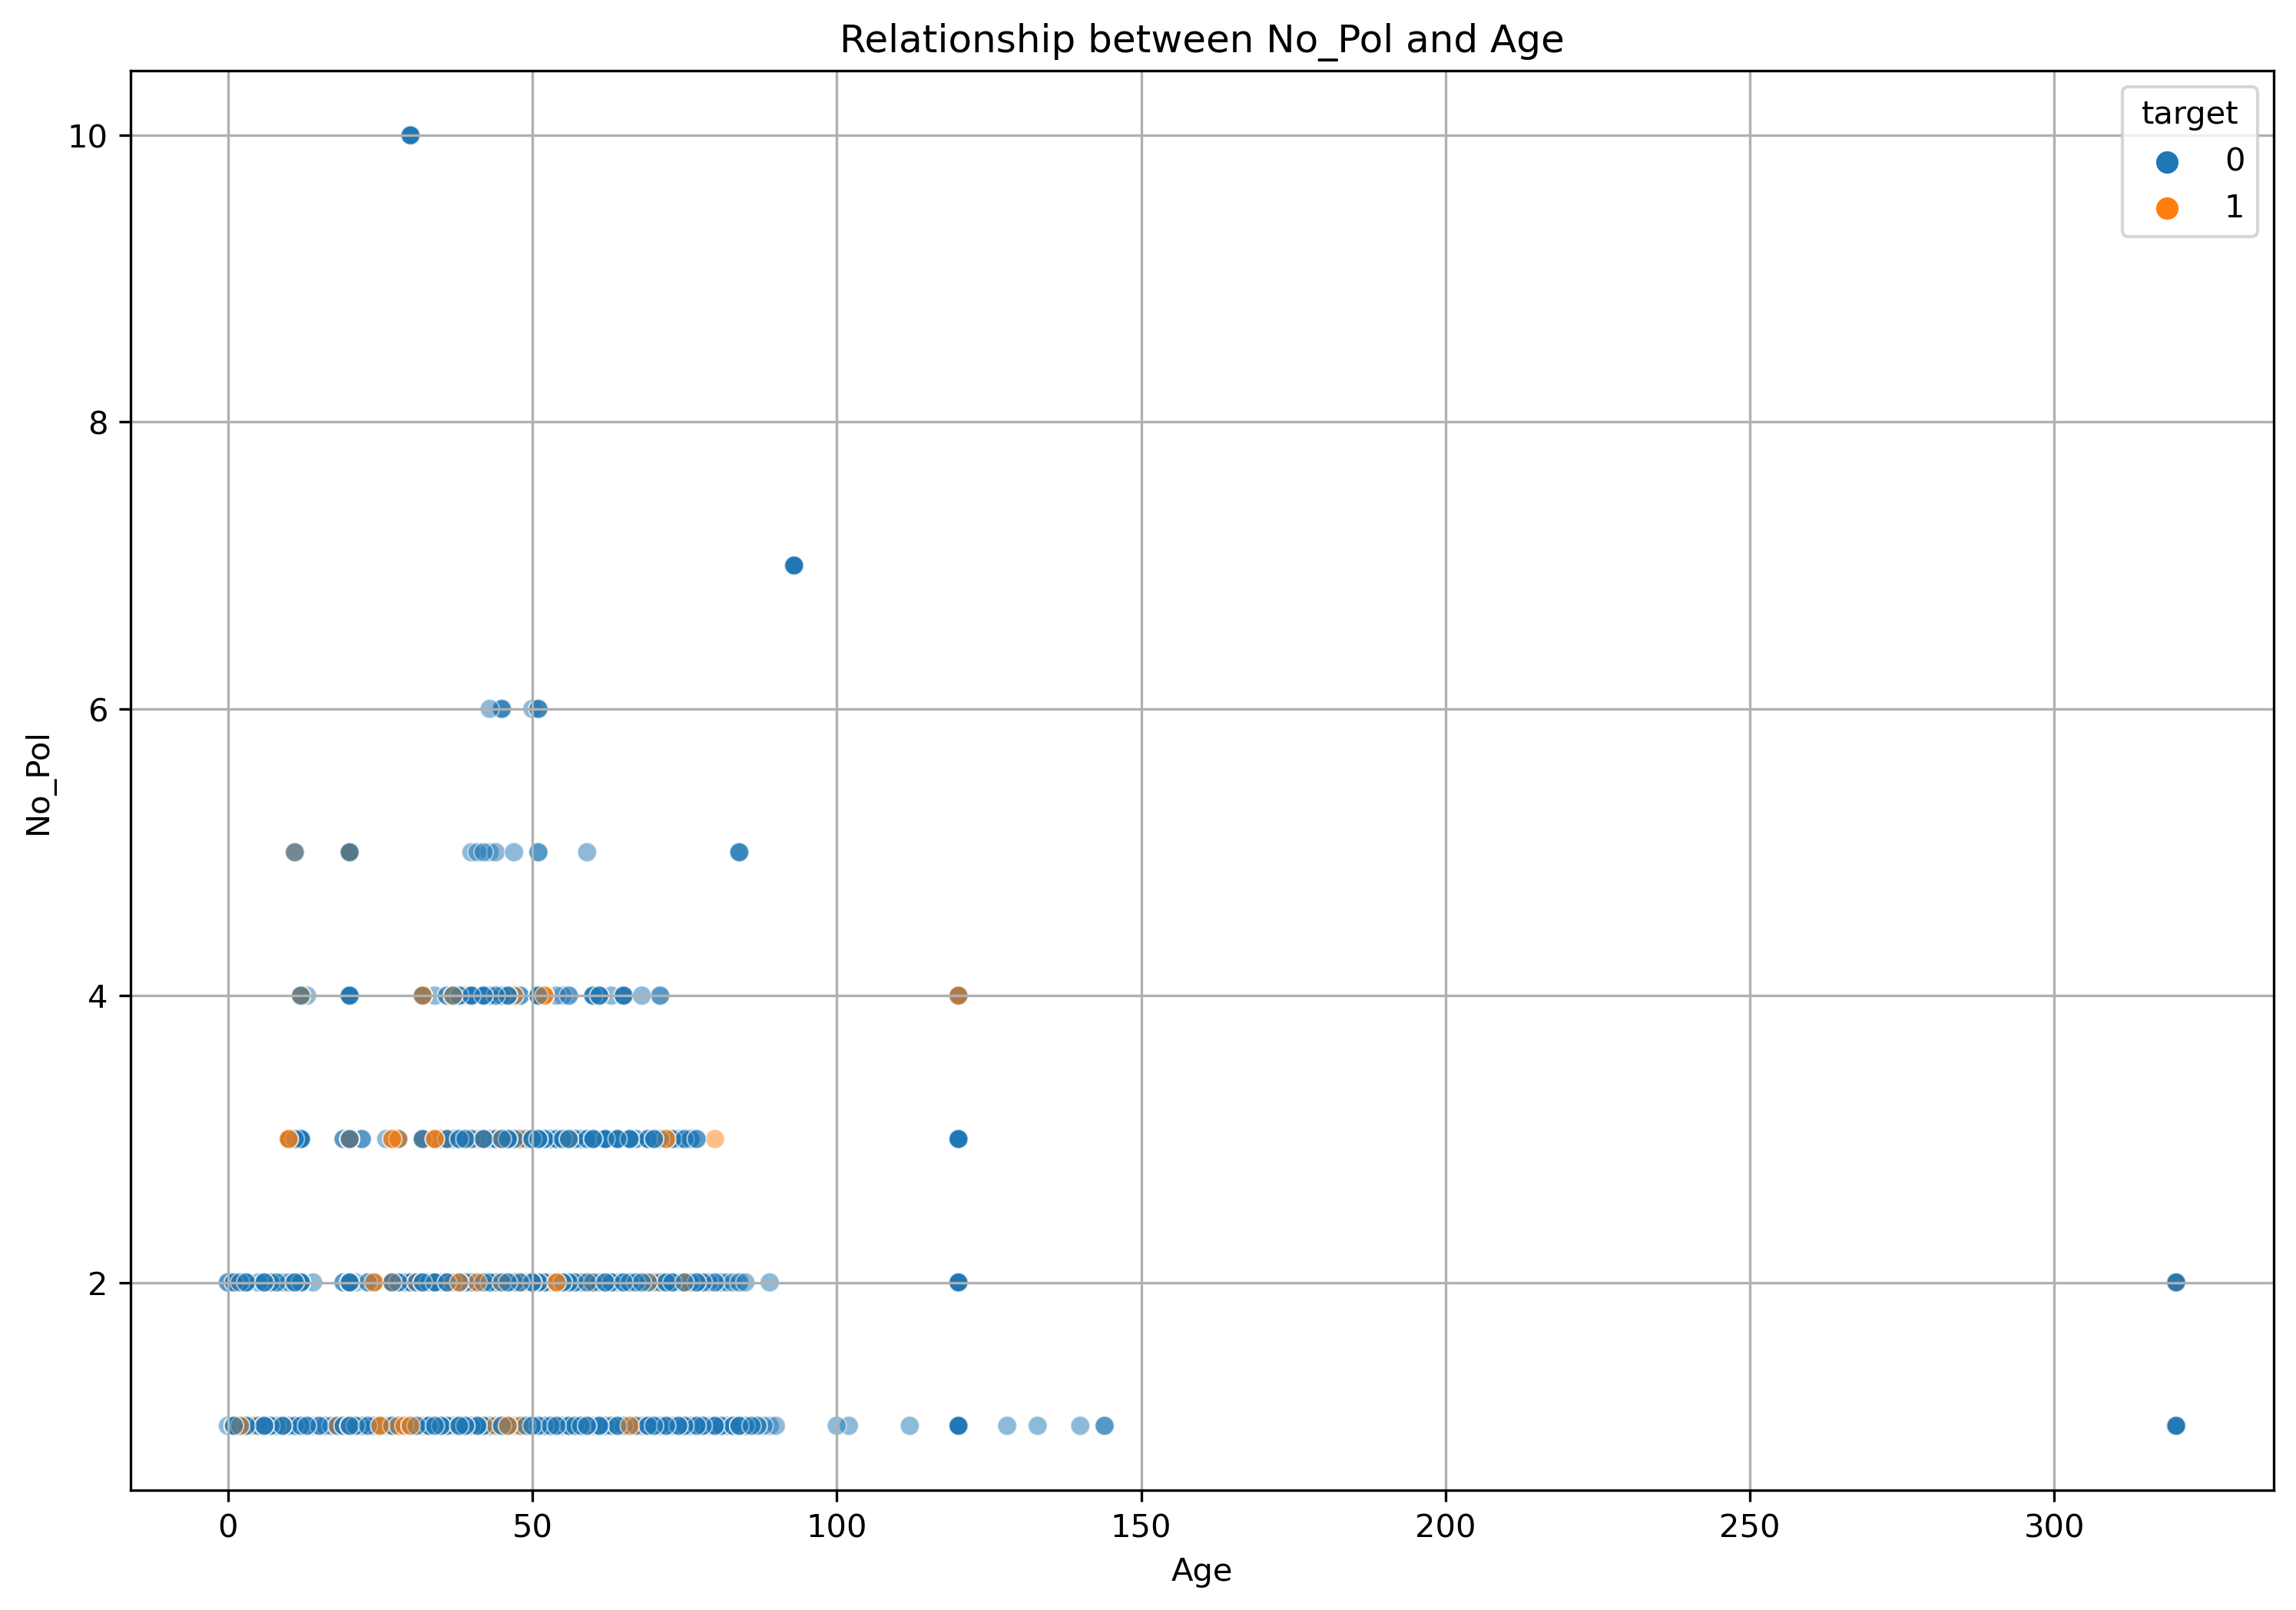

In [221]:
plt.figure(figsize=(12,8),dpi=300)
sns.scatterplot(data=data, x= data['Age'], y=data['No_Pol'], hue='target', alpha=0.5)
plt.grid(True)
plt.title('Relationship between No_Pol and Age');

### 9. Can we show a pie chart or bar plot of the target variable’s distribution by Subject_Car_Colour?

In [222]:
scct = pd.crosstab(data['Subject_Car_Colour'], data['target'])
scct

target,0,1
Subject_Car_Colour,,
As Attached,378,116
Ash,104,29
B.Silver,2,0
Beige Mitalic,1,0
Black,1597,282
Black & Orange,2,0
Black & White,1,1
Blue,260,100
Blue & Red,1,2


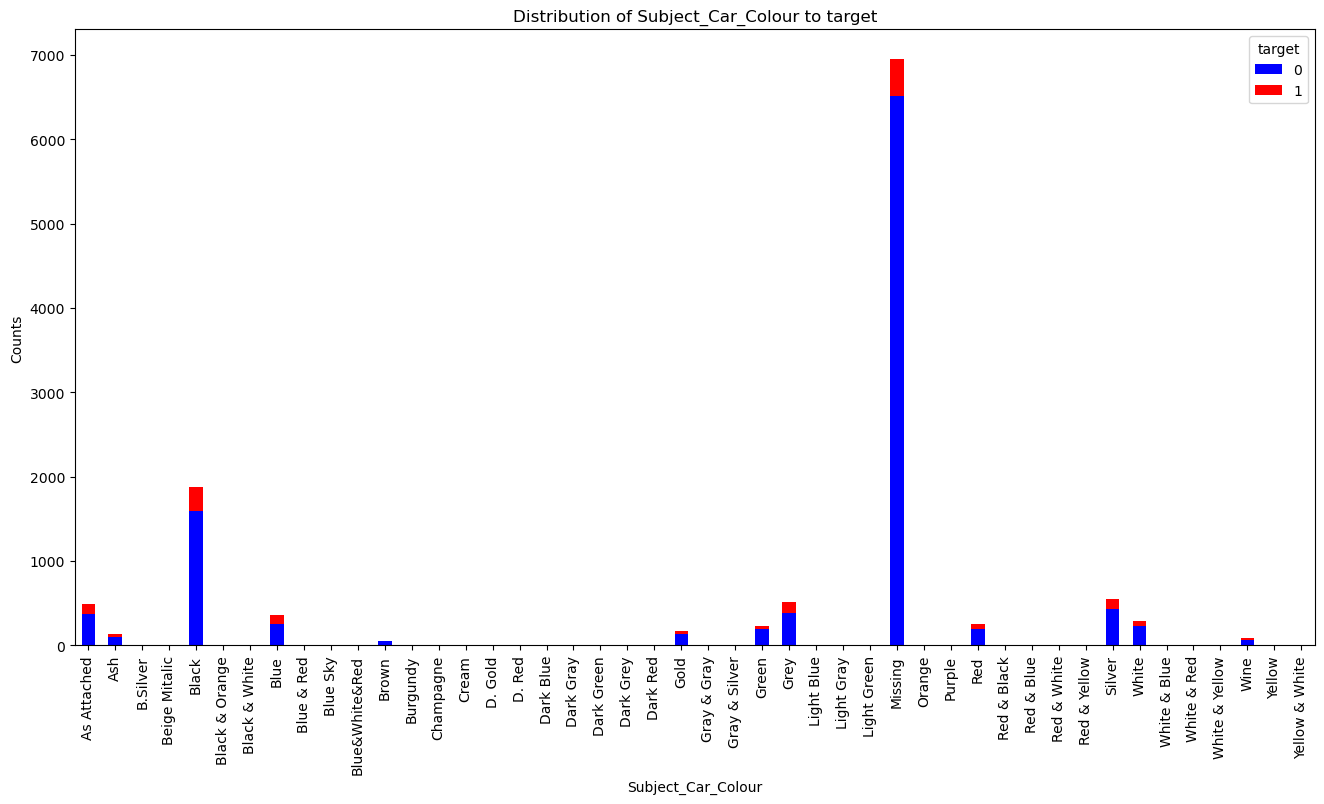

In [223]:
scct.plot(kind='bar', stacked=True, color=['blue','red'], figsize=(16,8))
plt.ylabel('Counts')
plt.title('Distribution of Subject_Car_Colour to target');

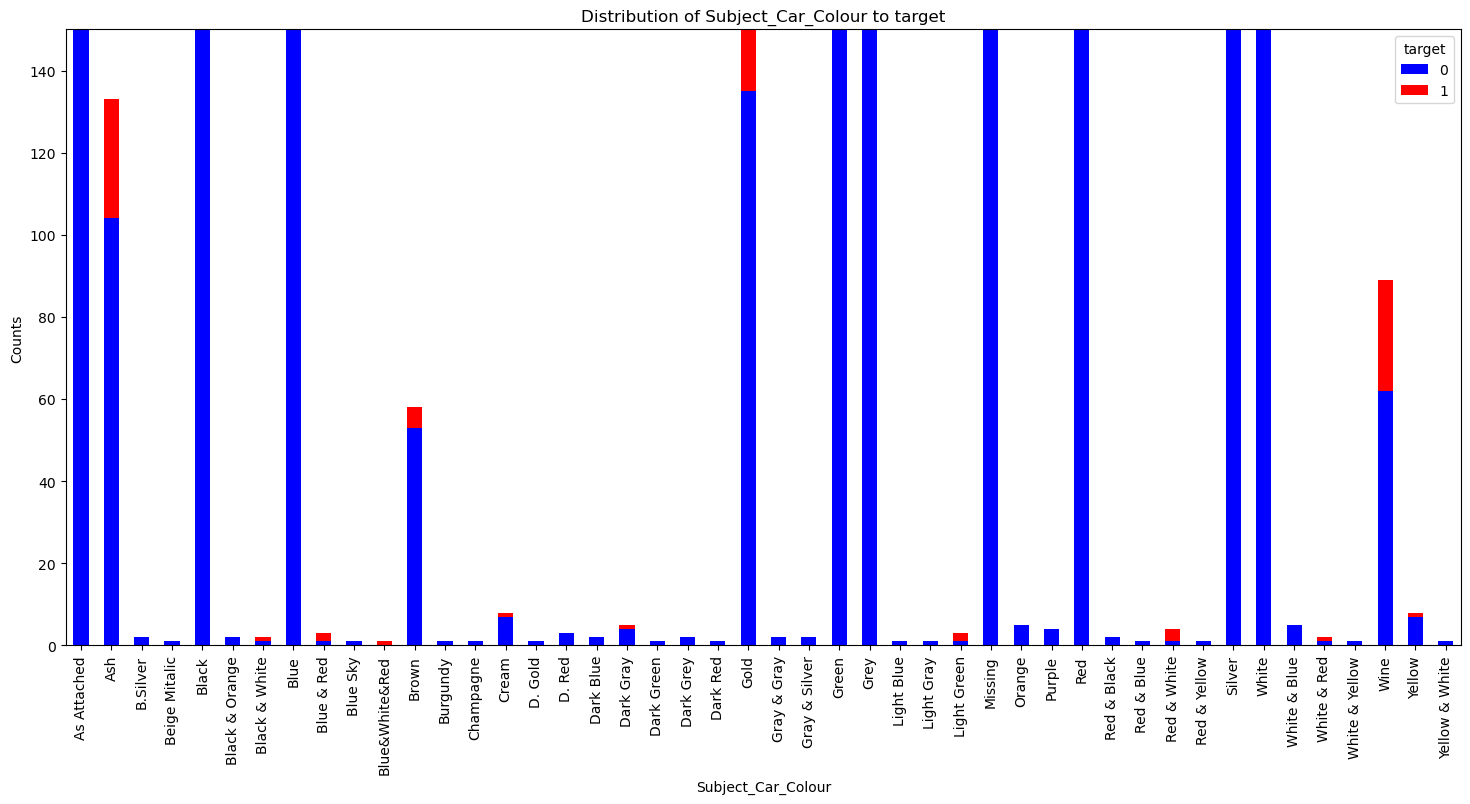

In [224]:
scct.plot(kind='bar', stacked=True, color=['blue','red'], figsize=(18,8))
plt.ylabel('Counts')
plt.title('Distribution of Subject_Car_Colour to target')
plt.ylim(0,150);

### 10. Can we create a box plot of Age for each car category (Car_Category) to compare age distributions?

In [225]:
data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date_diff', 'Start_Month', 'Time_length',
       'Length_Days', 'Range of Days', 'Age Range', 'Geo Location'],
      dtype='object')

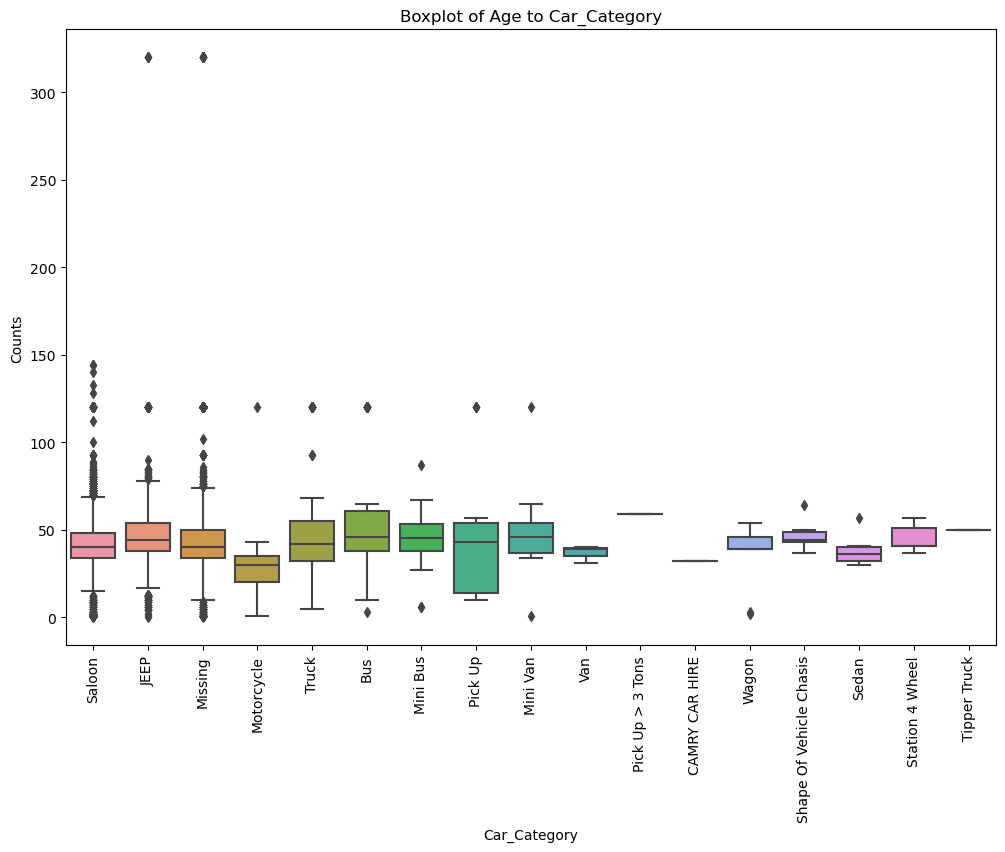

In [226]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['Car_Category'], y=data['Age'])
plt.xticks(rotation=90)
plt.title('Boxplot of Age to Car_Category')
plt.ylabel('Counts');

## Observations:

#### Gender

#### Month

Policy activities (target 0 and 1) occur throughout the year, with consistent counts across all months.
July appears to have slightly higher activity, while other months are relatively stable.
The proportion of 1 targets to 0 targets remains consistent across months.

#### Geo Location

The South West has the largest number of customers, followed by "Missing" and the North Central region.
Most of the entries in the "Missing" category have a target of 0, similar to other regions.
Very few entries exist for regions like North East, North West, and South South.

#### Car Make

Certain car makes, such as "Toyota" and "Missing," have a significantly higher frequency compared to others.
The distribution of the target variable (0 vs. 1) indicates a clear dominance of the majority class (0) across 
most car makes, but some car makes (e.g., Toyota, Mercedes) have higher instances of the minority class (1).

#### Relationship between No_Pol and Age

Most data points are concentrated in younger age ranges (under 50) and lower policy numbers (1–4 policies).
Outliers exist in the age variable, with extreme values reaching over 200 and 300 years, which is highly unrealistic.
There is no clear linear relationship between the number of policies and age, but some instances of target class 1 are scattered across.

## Suggestions:

#### Gender-Specific Strategies

Given the dominance of male customers, targeted marketing strategies for females could help tap into an underrepresented demographic.
Investigate why females and certain smaller categories (e.g., "Joint Gender") have relatively fewer entries.

#### Regional Focus

Explore why the South West has significantly more customers and policies. This could be due to population density or business practices in the region.
Address the "Missing" values in the Geo Location field by improving data collection processes.

#### Analyze July Patterns

Investigate the reasons behind July's higher activity. It could be linked to promotional campaigns, renewal cycles, or other factors.

#### Data Quality Improvements

Clean the "Missing" and "Unknown" entries in Geo Location and Gender for more actionable insights.
If possible, segment the policies into urban and rural areas for deeper geographic analysis.

#### Handle Missing Data

Investigate and impute or drop records with "Missing" values in critical features like Geo Location.
Perform root cause analysis to understand why so much data is missing.

## Conclusions:

#### Gender Influence

The dataset has a significant skew toward male customers, which may reflect the broader customer base. However, the ratio of target 1 to 0 is similar across genders.

#### Temporal Trends

Policy activity is steady across months, suggesting no major seasonality in target behavior. However, July may warrant closer investigation to determine why it has higher activity.

#### Geographic Distribution

The South West dominates policy activities, likely indicating a concentration of customers in that region. This might reflect demographic or business focus in this area.
The "Missing" location data points to incomplete data, which should ideally be addressed for accurate regional analysis.

#### Data Imbalance

Both the car make and geo-location features have an imbalance in the target variable. Class 1 is underrepresented.

#### Data Quality Issues

The "Missing" category for Geo Location and some other attributes suggests data gaps that need to be addressed.
Unrealistic age values (e.g., 200+ years) indicate data quality issues that could affect analysis and model performance.

#### Feature Relationships

The number of policies and age do not exhibit a clear relationship with the target variable, implying they may have weak predictive power alone.
However, specific car makes (e.g., Toyota, Mercedes) and certain locations (e.g., South-West) might be better predictors of the target class 1.